In [1]:
import pandas as pd
from utils import *

In [2]:
prev = pd.read_csv(r"D:\Vũ Xuân Bách\NEU-HK5\Data Preparation\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_previous_application.csv")

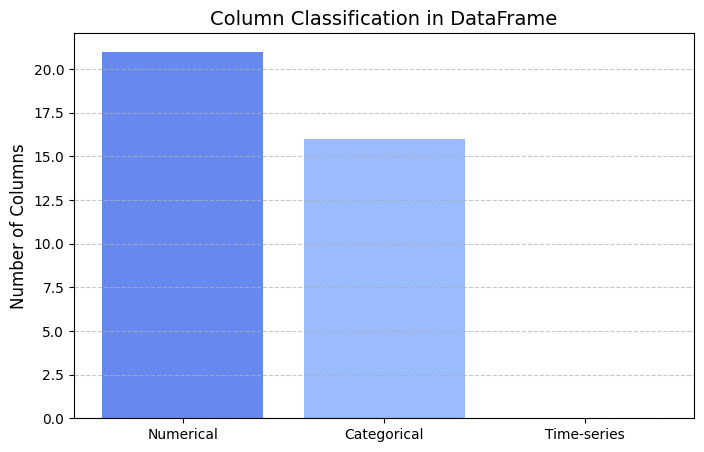

In [3]:
display_dataframe_info(prev)

#### This dataset has 1413701 rows and 37 columns. There are 19 columns in numertic format and 18 columns in categorical format.

d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


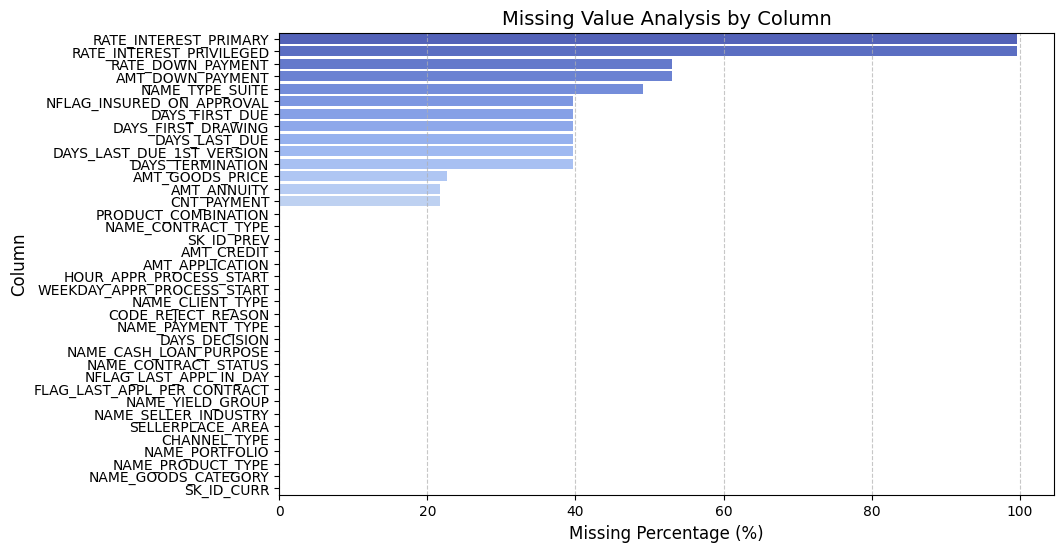

In [4]:
analyze_missing_values(prev)

### Observations on Missing Data Percentage in Columns

#### **1. Columns with Extremely High Missing Percentage (>90%):**
- `RATE_INTEREST_PRIMARY` and `RATE_INTEREST_PRIVILEGED`: **99.66% missing**  
  

#### **2. Columns with High Missing Percentage (50-70%):**
- `RATE_DOWN_PAYMENT` and `AMT_DOWN_PAYMENT`: **53.02% missing**  
  

- `NAME_TYPE_SUITE`: **49.14% missing**  
  

#### **3. Columns with Moderate Missing Percentage (20-40%):**
- `NFLAG_INSURED_ON_APPROVAL`, `DAYS_FIRST_DUE`, `DAYS_FIRST_DRAWING`, `DAYS_LAST_DUE`, `DAYS_LAST_DUE_1ST_VERSION`, and `DAYS_TERMINATION`: **39.69% missing**  
  

- `AMT_GOODS_PRICE`: **22.60% missing**  
  

- `AMT_ANNUITY` and `CNT_PAYMENT`: **21.73% missing**  
  

#### **4. Columns with Low Missing Percentage (<1%):**
- `PRODUCT_COMBINATION`: **0.02% missing**  
  

#### **5. Columns with No Missing Data (0%):**
- `NAME_CONTRACT_TYPE`, `SK_ID_PREV`, `AMT_CREDIT`, `AMT_APPLICATION`, `HOUR_APPR_PROCESS_START`, `WEEKDAY_APPR_PROCESS_START`, `NAME_CLIENT_TYPE`, `CODE_REJECT_REASON`, `NAME_PAYMENT_TYPE`, `DAYS_DECISION`, `NAME_CASH_LOAN_PURPOSE`, `NAME_CONTRACT_STATUS`, `NFLAG_LAST_APPL_IN_DAY`, `FLAG_LAST_APPL_PER_CONTRACT`, `NAME_YIELD_GROUP`, `NAME_SELLER_INDUSTRY`, `SELLERPLACE_AREA`, `CHANNEL_TYPE`, `NAME_PORTFOLIO`, `NAME_PRODUCT_TYPE`, `NAME_GOODS_CATEGORY`, `SK_ID_CURR`: **0% missing**  
  

---

### **Summary:**
- Columns with extremely high missing percentages (>90%) such as `RATE_INTEREST_PRIMARY` and `RATE_INTEREST_PRIVILEGED` are likely candidates for removal.
- Columns with moderate to high missing percentages (20-50%) may require careful handling through imputation or analysis of their importance.
- Columns with no missing data (0%) can be directly utilized in the analysis.


In [5]:
basic_statistics_summary(prev)

In [6]:
app_train = pd.read_csv(r"D:\Vũ Xuân Bách\NEU-HK5\Data Preparation\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\application_train.csv")
prev_app = merge_target(prev,app_train)

Successfully merged 'TARGET' column into the data.


## Visualize categorical columns

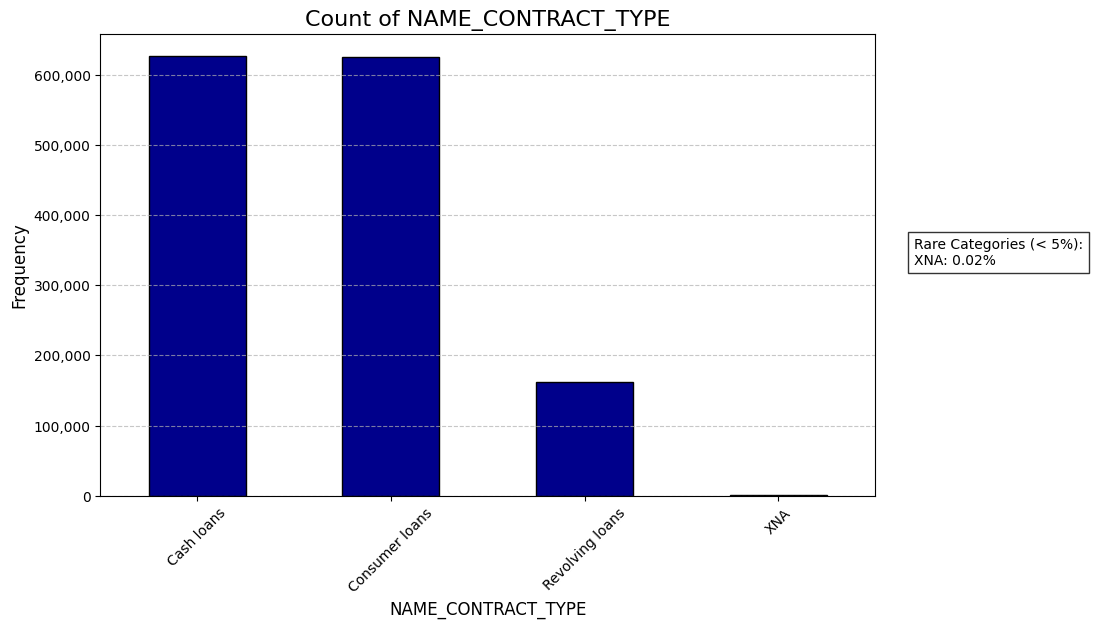

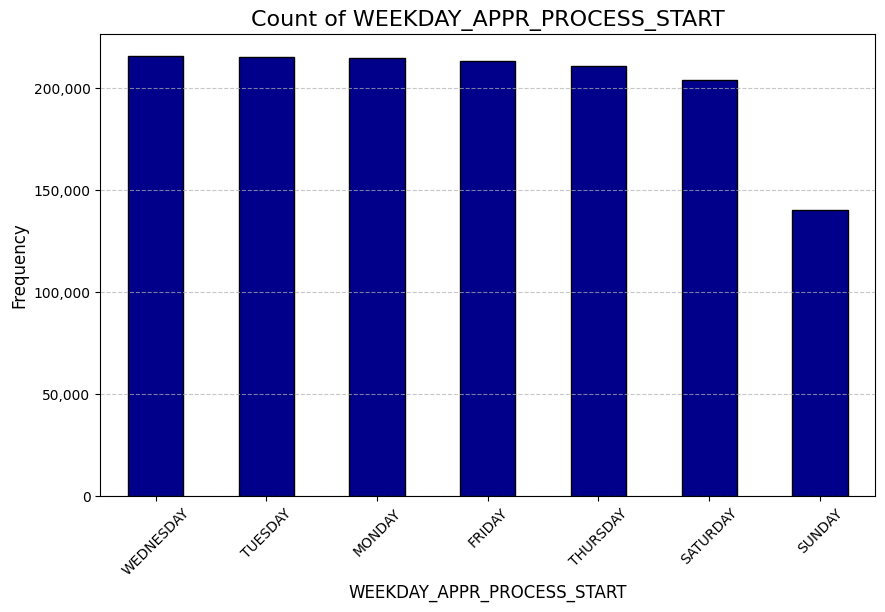

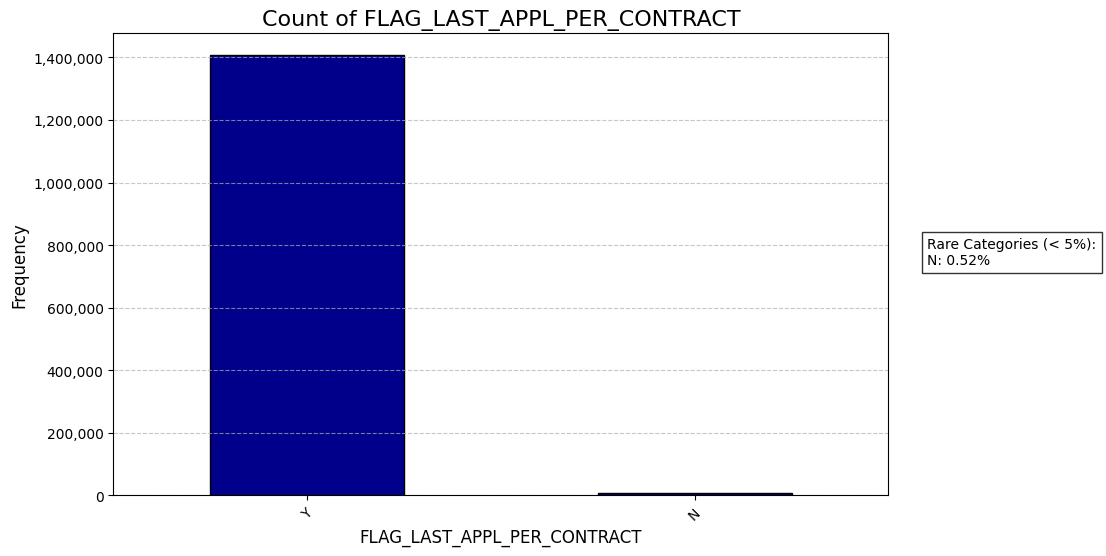

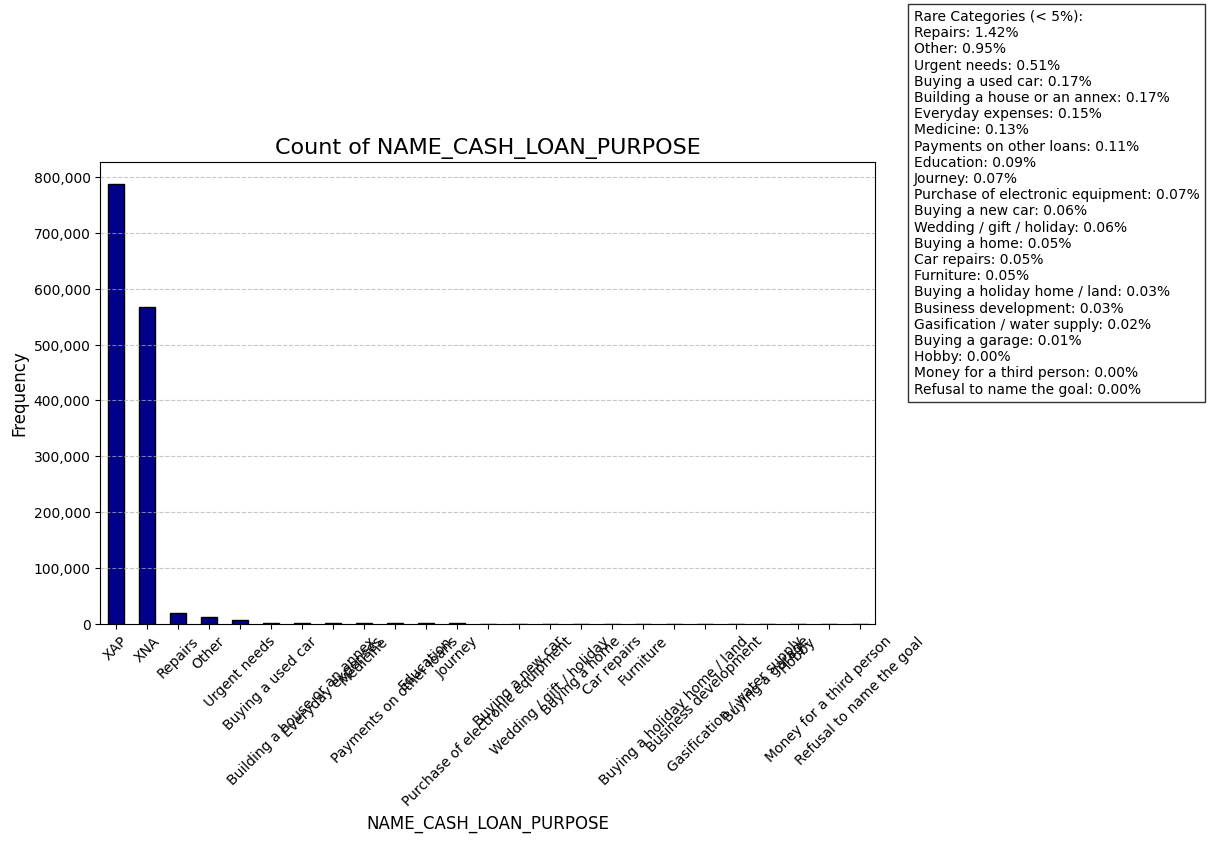

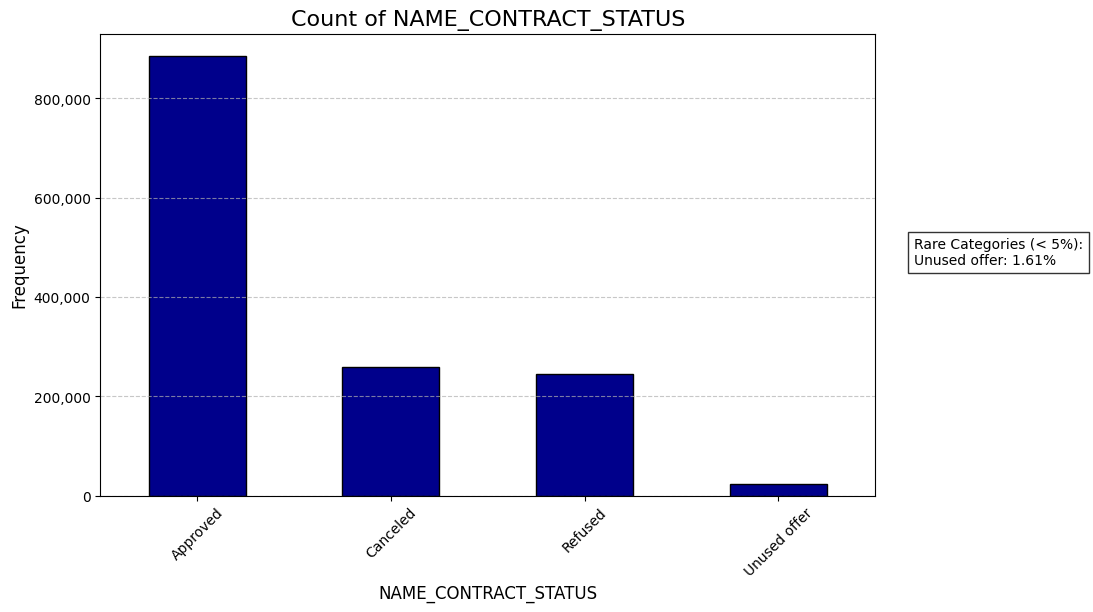

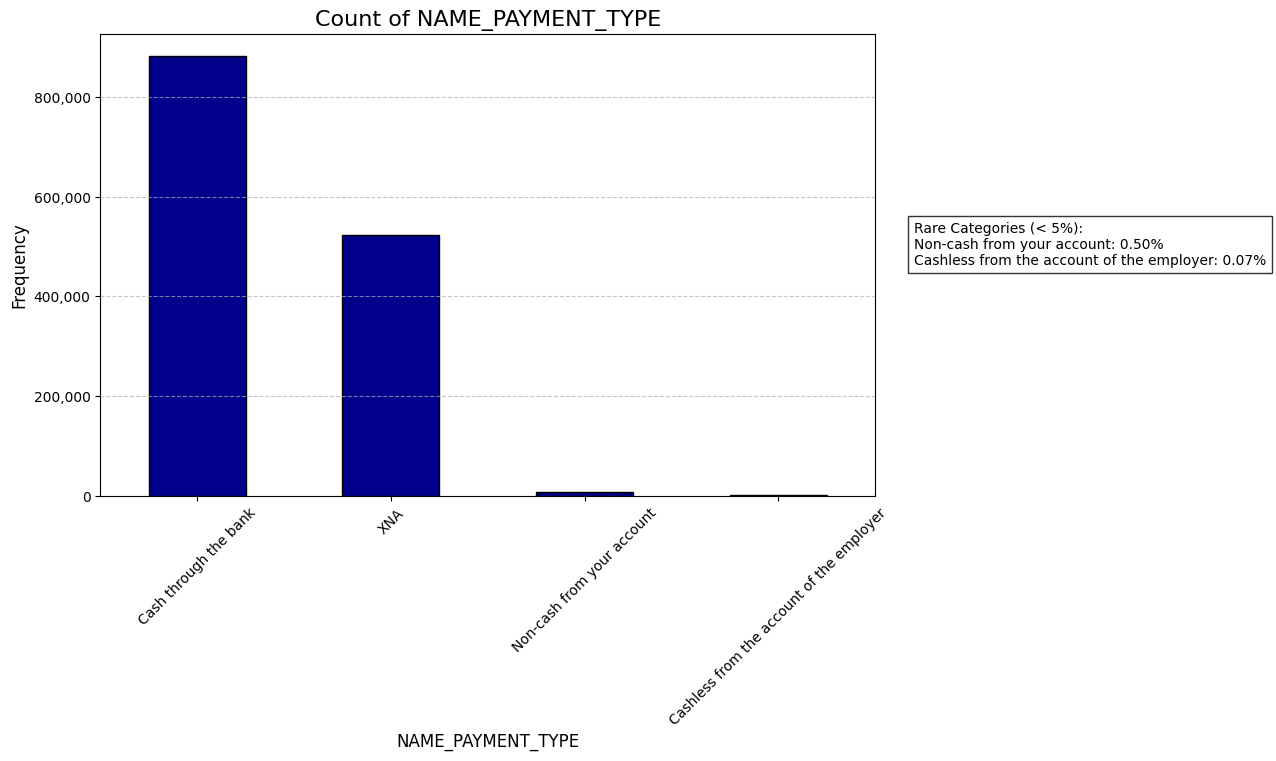

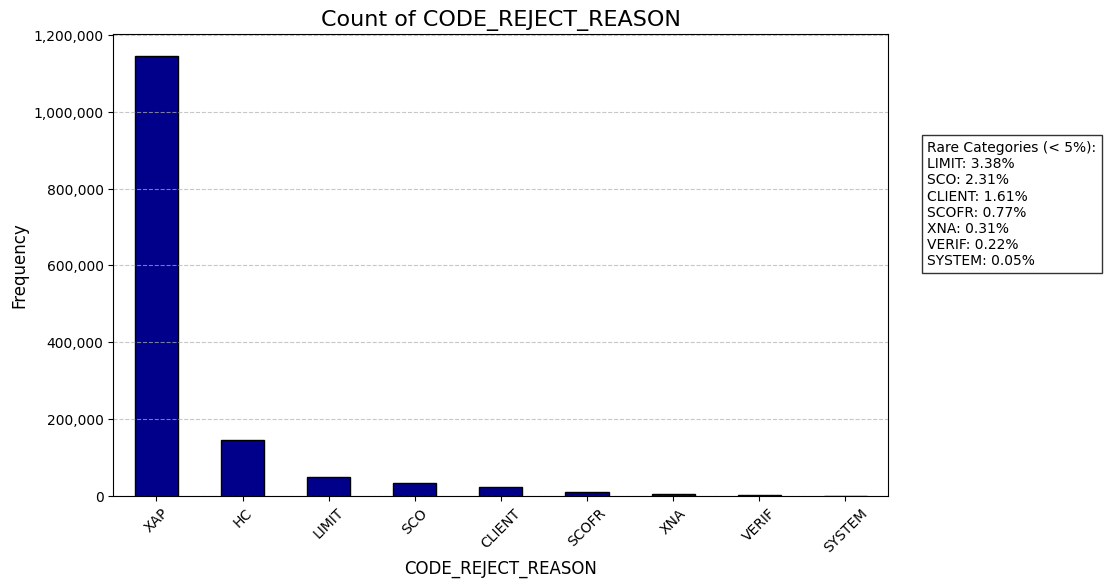

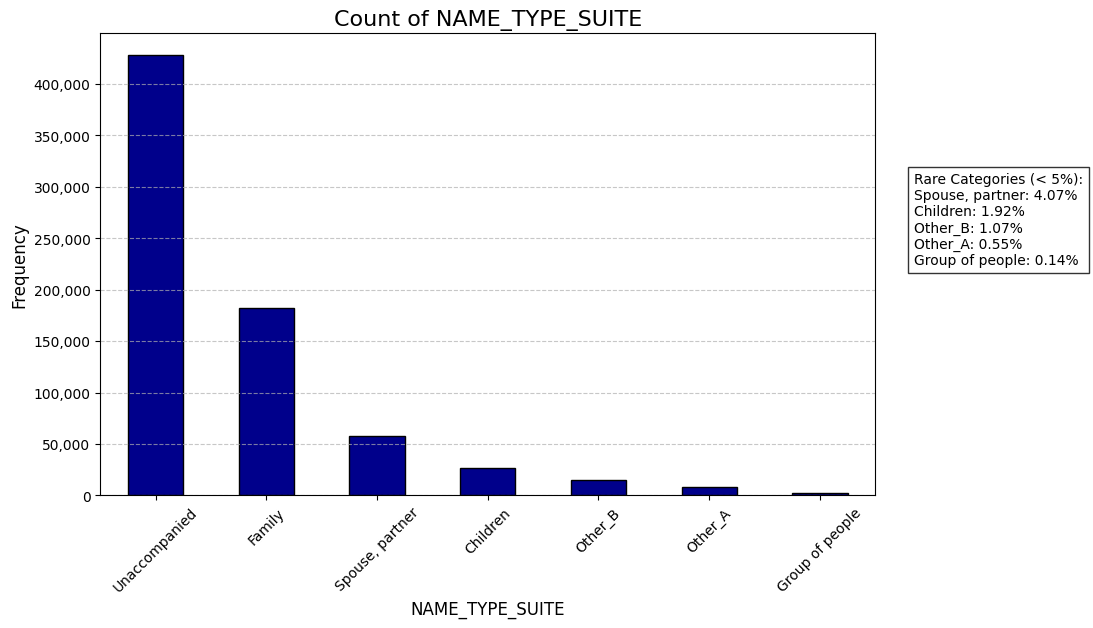

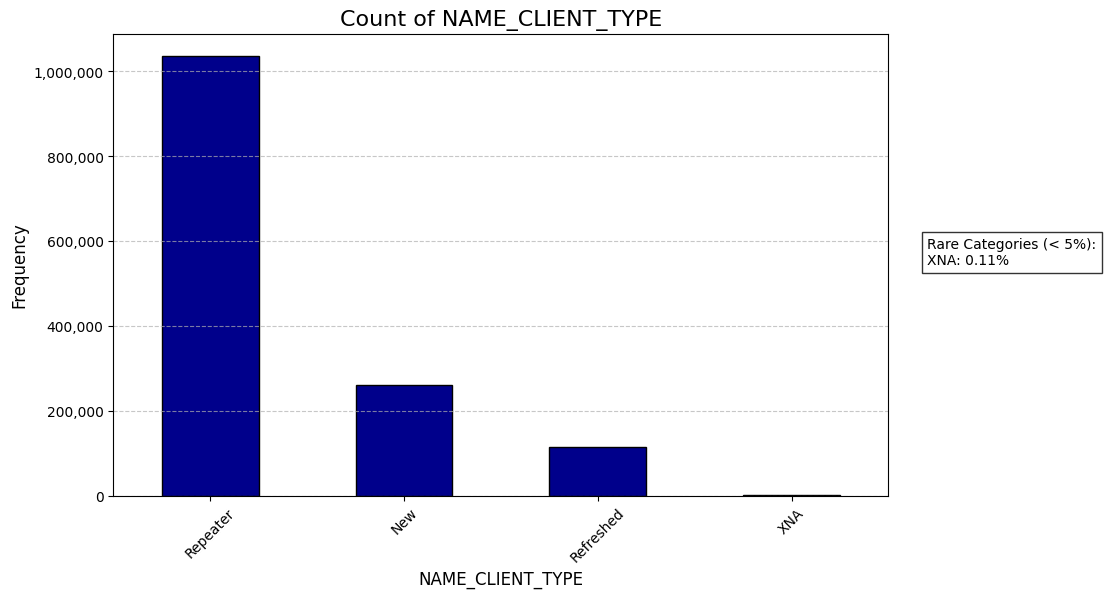

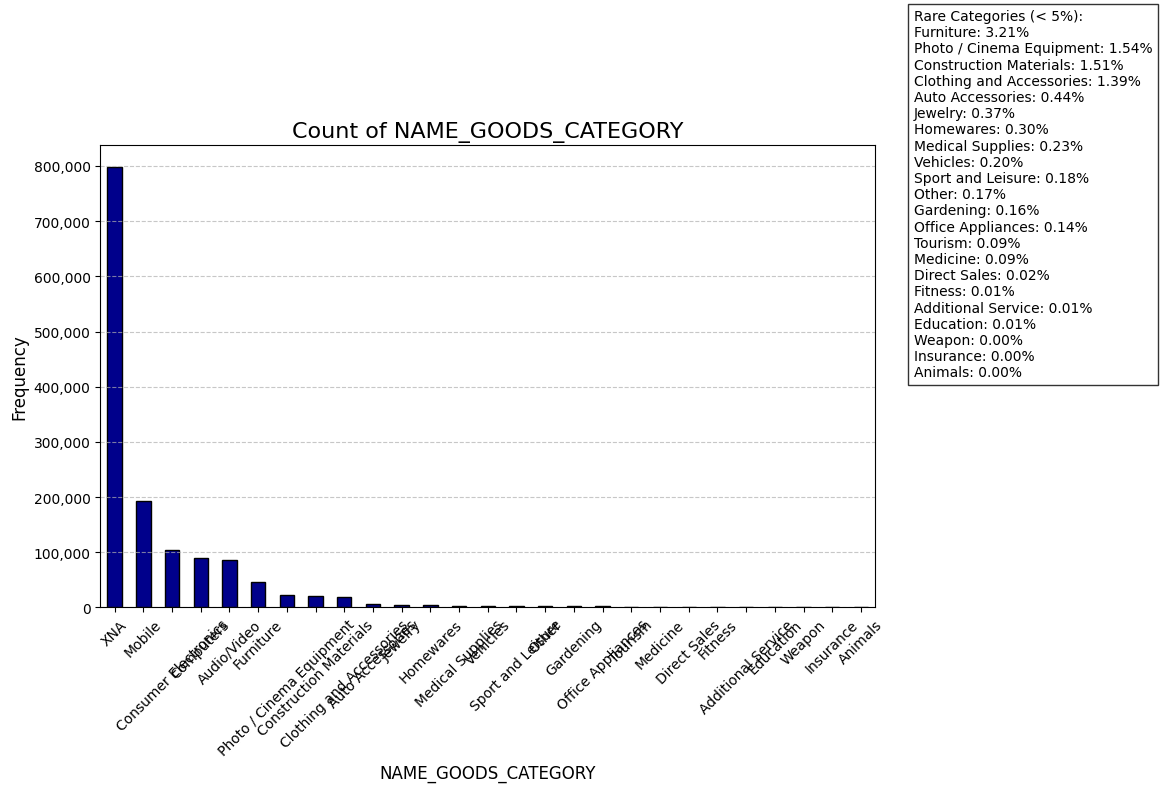

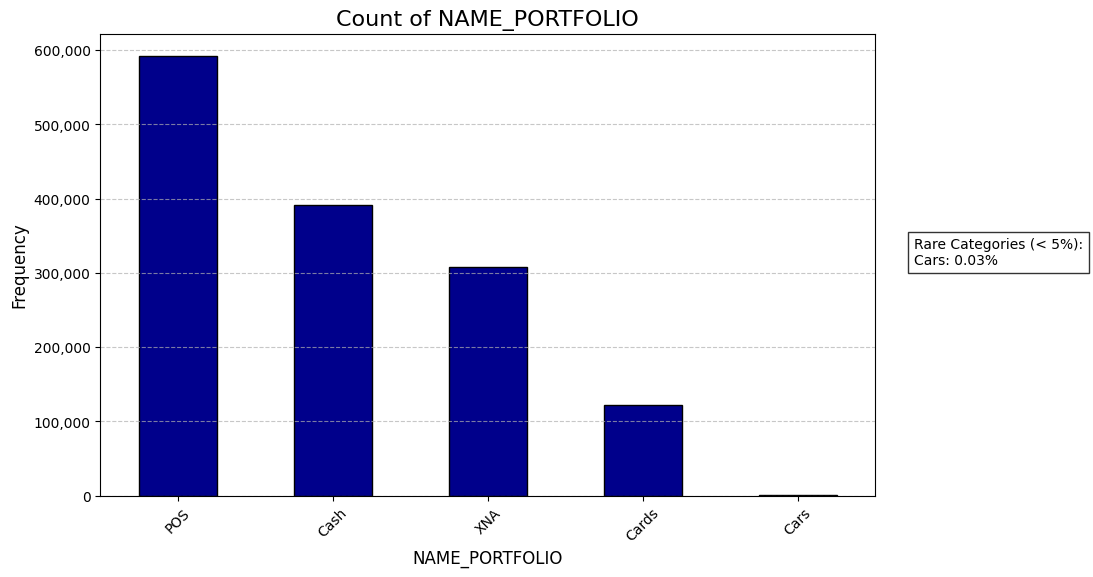

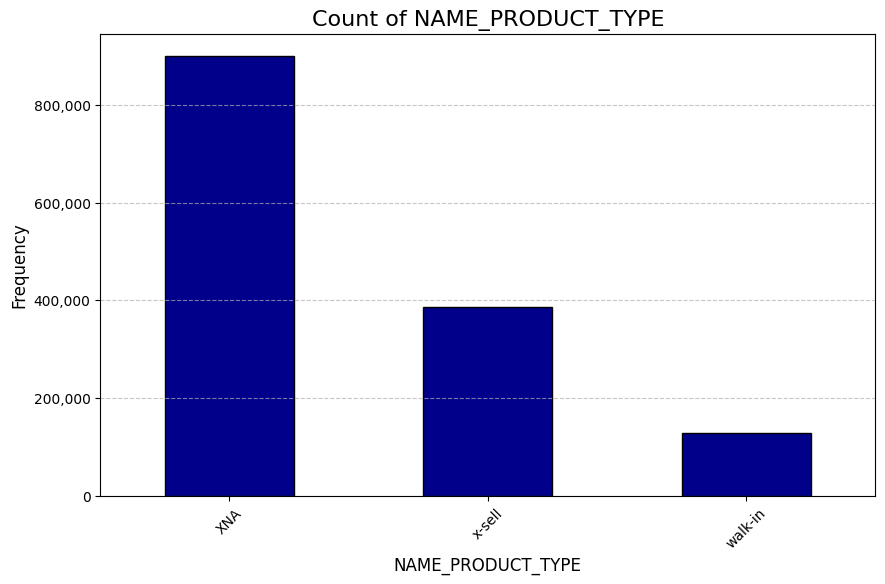

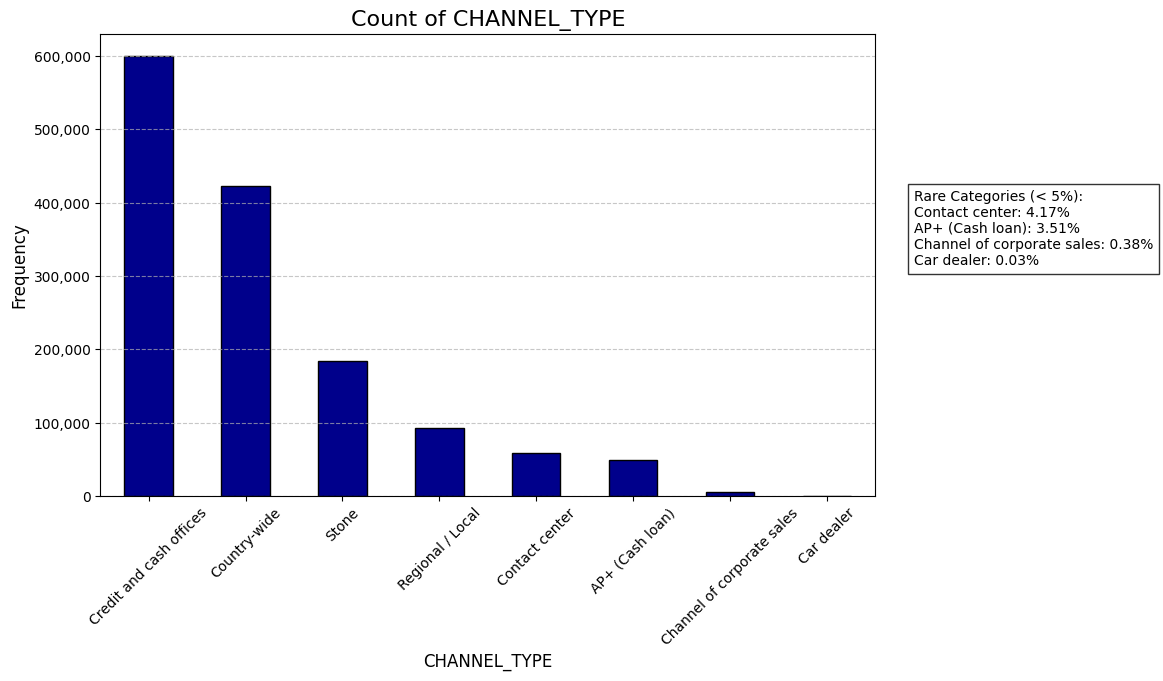

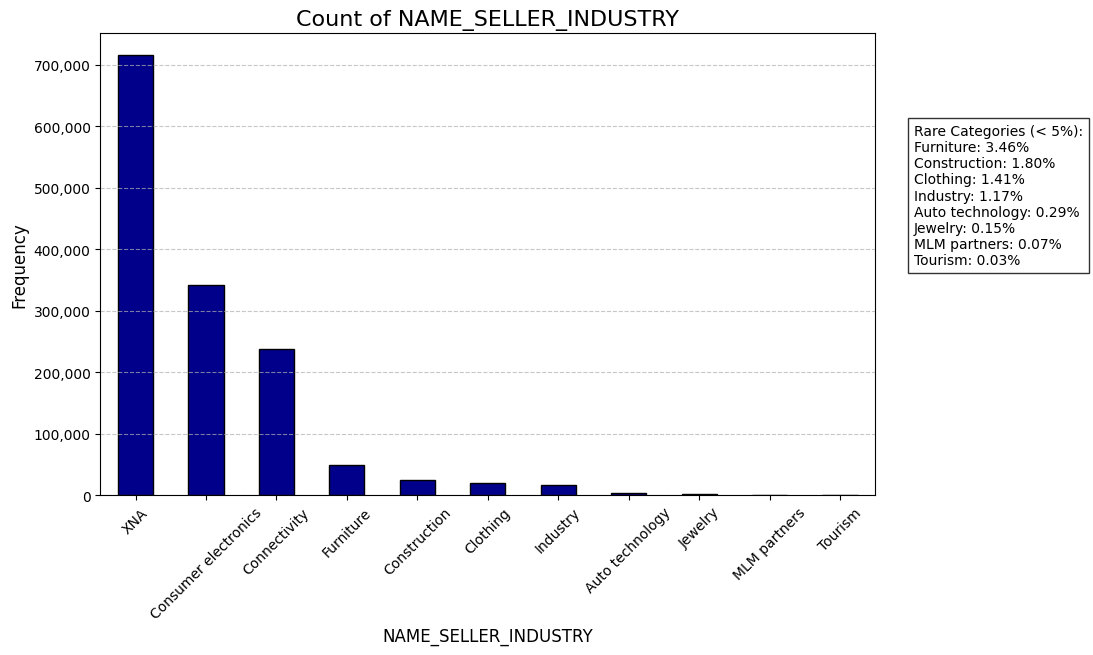

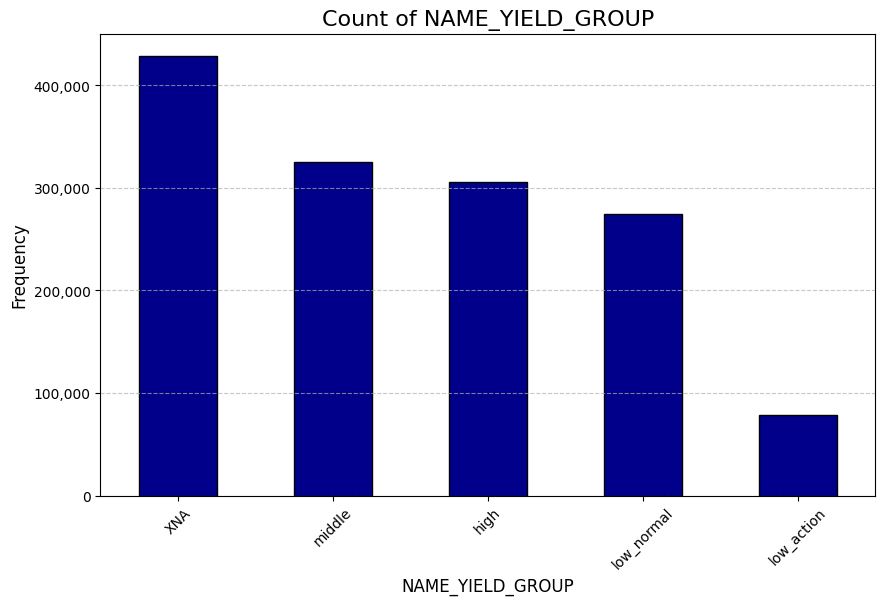

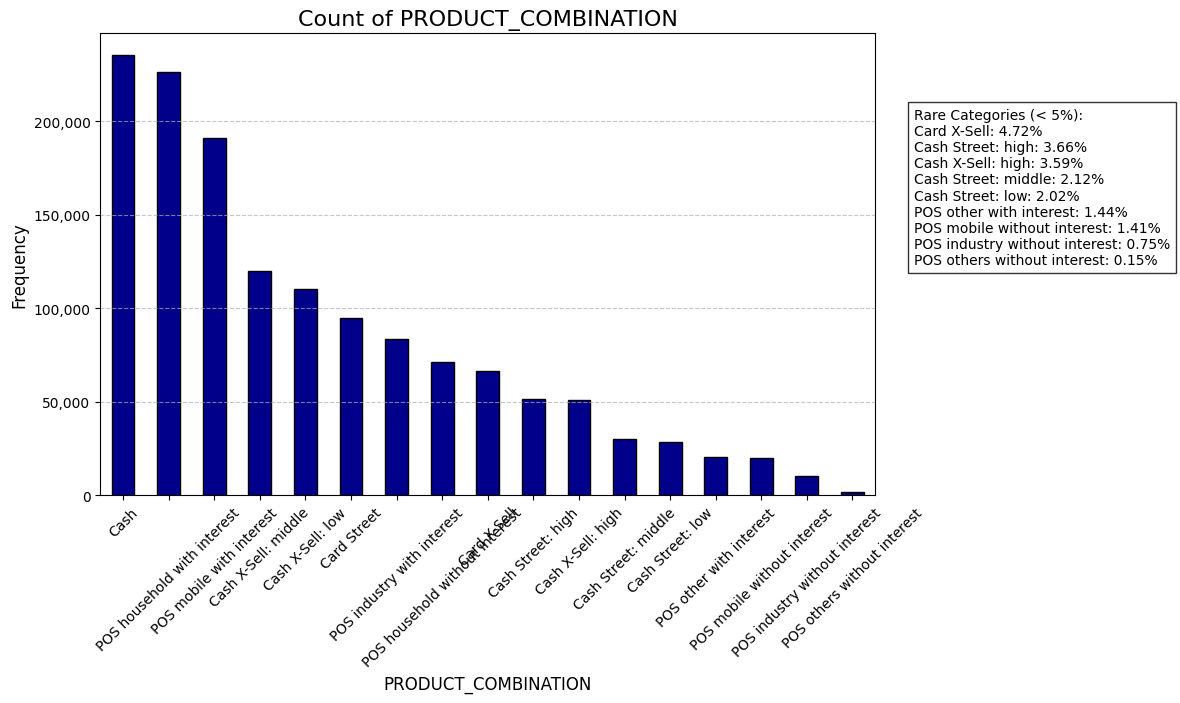

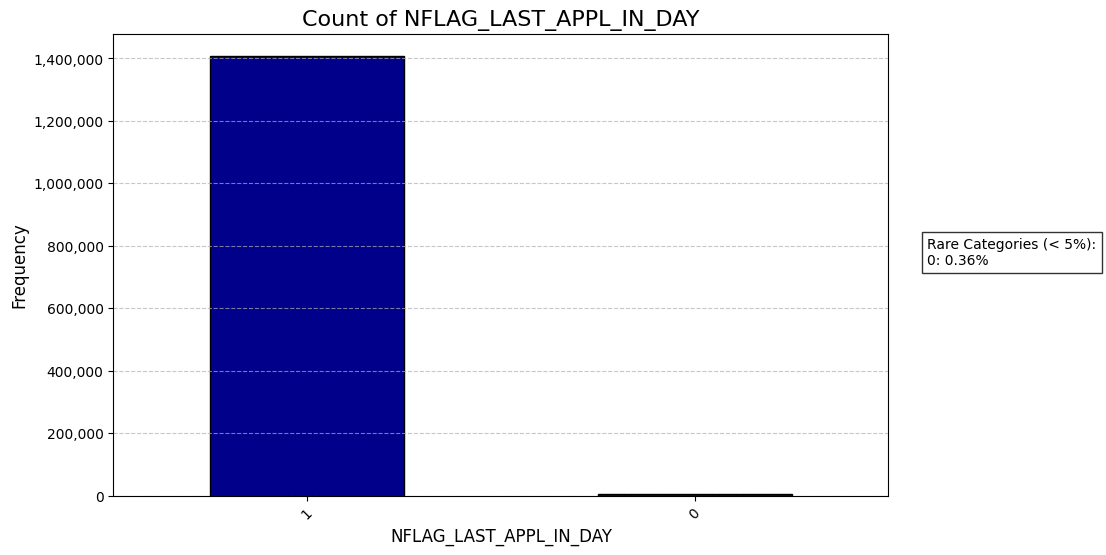

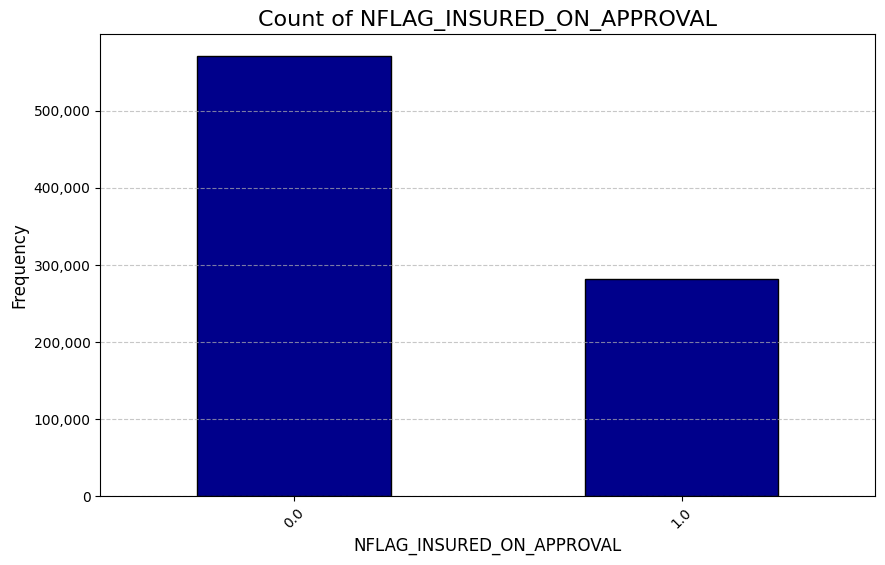

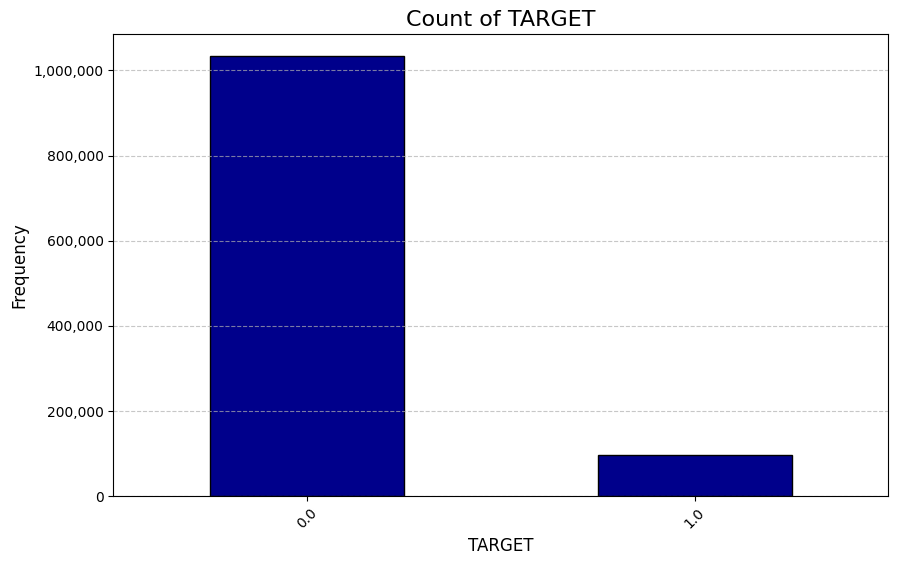

In [7]:
visualize_cate_with_rare_and_binary(prev_app,5)

FLAG_LAST_APPL_PER_CONTRACT: The category 'Y' is overwhelmingly dominant, accounting for the majority of the data (nearly 99.48%).

NAME_CASH_LOAN_PURPOSE: XAP and XNA are the most common loan purposes, accounting for 99.99% of the data.

NAME_CLIENT_TYPE: Most of the customers are 'Repeater'

## Correlation

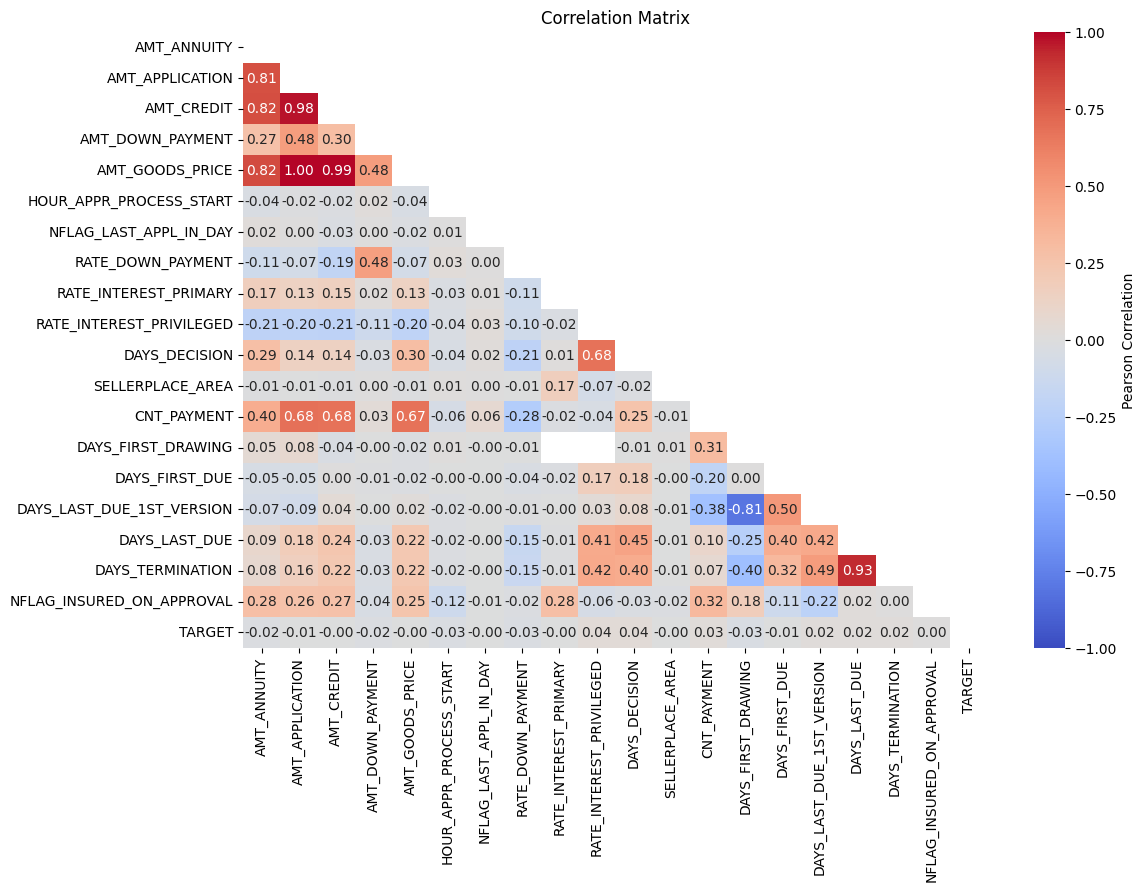


Strong correlations above threshold:
                   Variable 1                 Variable 2  Correlation
21            AMT_APPLICATION            AMT_GOODS_PRICE     0.999871
38                 AMT_CREDIT            AMT_GOODS_PRICE     0.993201
19            AMT_APPLICATION                 AMT_CREDIT     0.975683
182             DAYS_LAST_DUE           DAYS_TERMINATION     0.927741
3                 AMT_ANNUITY            AMT_GOODS_PRICE     0.822204
1                 AMT_ANNUITY                 AMT_CREDIT     0.817977
0                 AMT_ANNUITY            AMT_APPLICATION     0.809972
29            AMT_APPLICATION                CNT_PAYMENT     0.683056
134  RATE_INTEREST_PRIVILEGED              DAYS_DECISION     0.677183
46                 AMT_CREDIT                CNT_PAYMENT     0.675539
77            AMT_GOODS_PRICE                CNT_PAYMENT     0.674547
173            DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION     0.503316
168        DAYS_FIRST_DRAWING  DAYS_LAST_DUE_1ST_VER

In [8]:
correlation_matrix(prev_app)

### Observations on Strong Correlations in the Dataset:

1. **High Positive Correlations** (Correlation > 0.8):
   - **`AMT_APPLICATION` vs `AMT_GOODS_PRICE` (0.999871)** and **`AMT_GOODS_PRICE` vs `AMT_APPLICATION` (0.999871)**:  
     These two columns show an extremely high correlation, indicating that the amount of application and the goods price are nearly identical or directly related. One of these columns could potentially be dropped due to redundancy.

   - **`AMT_GOODS_PRICE` vs `AMT_CREDIT` (0.993201)** and **`AMT_CREDIT` vs `AMT_GOODS_PRICE` (0.993201)**:  
     A very high correlation, suggesting that the amount of goods price is almost directly linked to the credit amount. One of these variables may not contribute additional information.

   - **`AMT_CREDIT` vs `AMT_APPLICATION` (0.975683)** and **`AMT_APPLICATION` vs `AMT_CREDIT` (0.975683)**:  
     These two features also show a high correlation, suggesting they are closely related, and thus, one might be redundant.

   - **`AMT_ANNUITY` vs `AMT_GOODS_PRICE` (0.822204)** and **`AMT_GOODS_PRICE` vs `AMT_ANNUITY` (0.822204)**:  
     High correlation between the annuity and the goods price indicates a possible relationship. Further investigation is required to determine whether these variables are equally informative.

   - **`AMT_ANNUITY` vs `AMT_CREDIT` (0.817977)** and **`AMT_CREDIT` vs `AMT_ANNUITY` (0.817977)**:  
     These columns also show a high correlation, implying a strong relationship between the annuity and credit amount.

   - **`AMT_APPLICATION` vs `AMT_ANNUITY` (0.809972)** and **`AMT_ANNUITY` vs `AMT_APPLICATION` (0.809972)**:  
     There is a significant correlation between the amount applied and the annuity, suggesting they are closely related.

   - **`AMT_APPLICATION` vs `CNT_PAYMENT` (0.683056)** and **`CNT_PAYMENT` vs `AMT_APPLICATION` (0.683056)**:  
     A moderate correlation between application amount and the number of payments, which may indicate a relationship between how much is applied and how payments are structured.

2. **Other Observations**:
   - **`DAYS_LAST_DUE` vs `DAYS_TERMINATION` (0.927741)** and **`DAYS_TERMINATION` vs `DAYS_LAST_DUE` (0.927741)**:  
     These two features are strongly correlated, which suggests they might be tracking similar information about loan termination and due dates.

   - **`DAYS_LAST_DUE_1ST_VERSION` vs `DAYS_FIRST_DUE` (0.503316)**:  
     A moderate positive correlation between these two, suggesting some connection between the initial due dates and the first version of the due date.

   - **`DAYS_FIRST_DRAWING` vs `DAYS_LAST_DUE_1ST_VERSION` (-0.809046)**:  
     A strong negative correlation, indicating an inverse relationship between the first drawing date and the last due date in the first version.




## Visualize numeric columns


Analyzing the following numerical variables with at least 10 unique values:
['SK_ID_PREV', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'HOUR_APPR_PROCESS_START', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'SK_ID_CURR']

Generating pairplot for numerical variables...


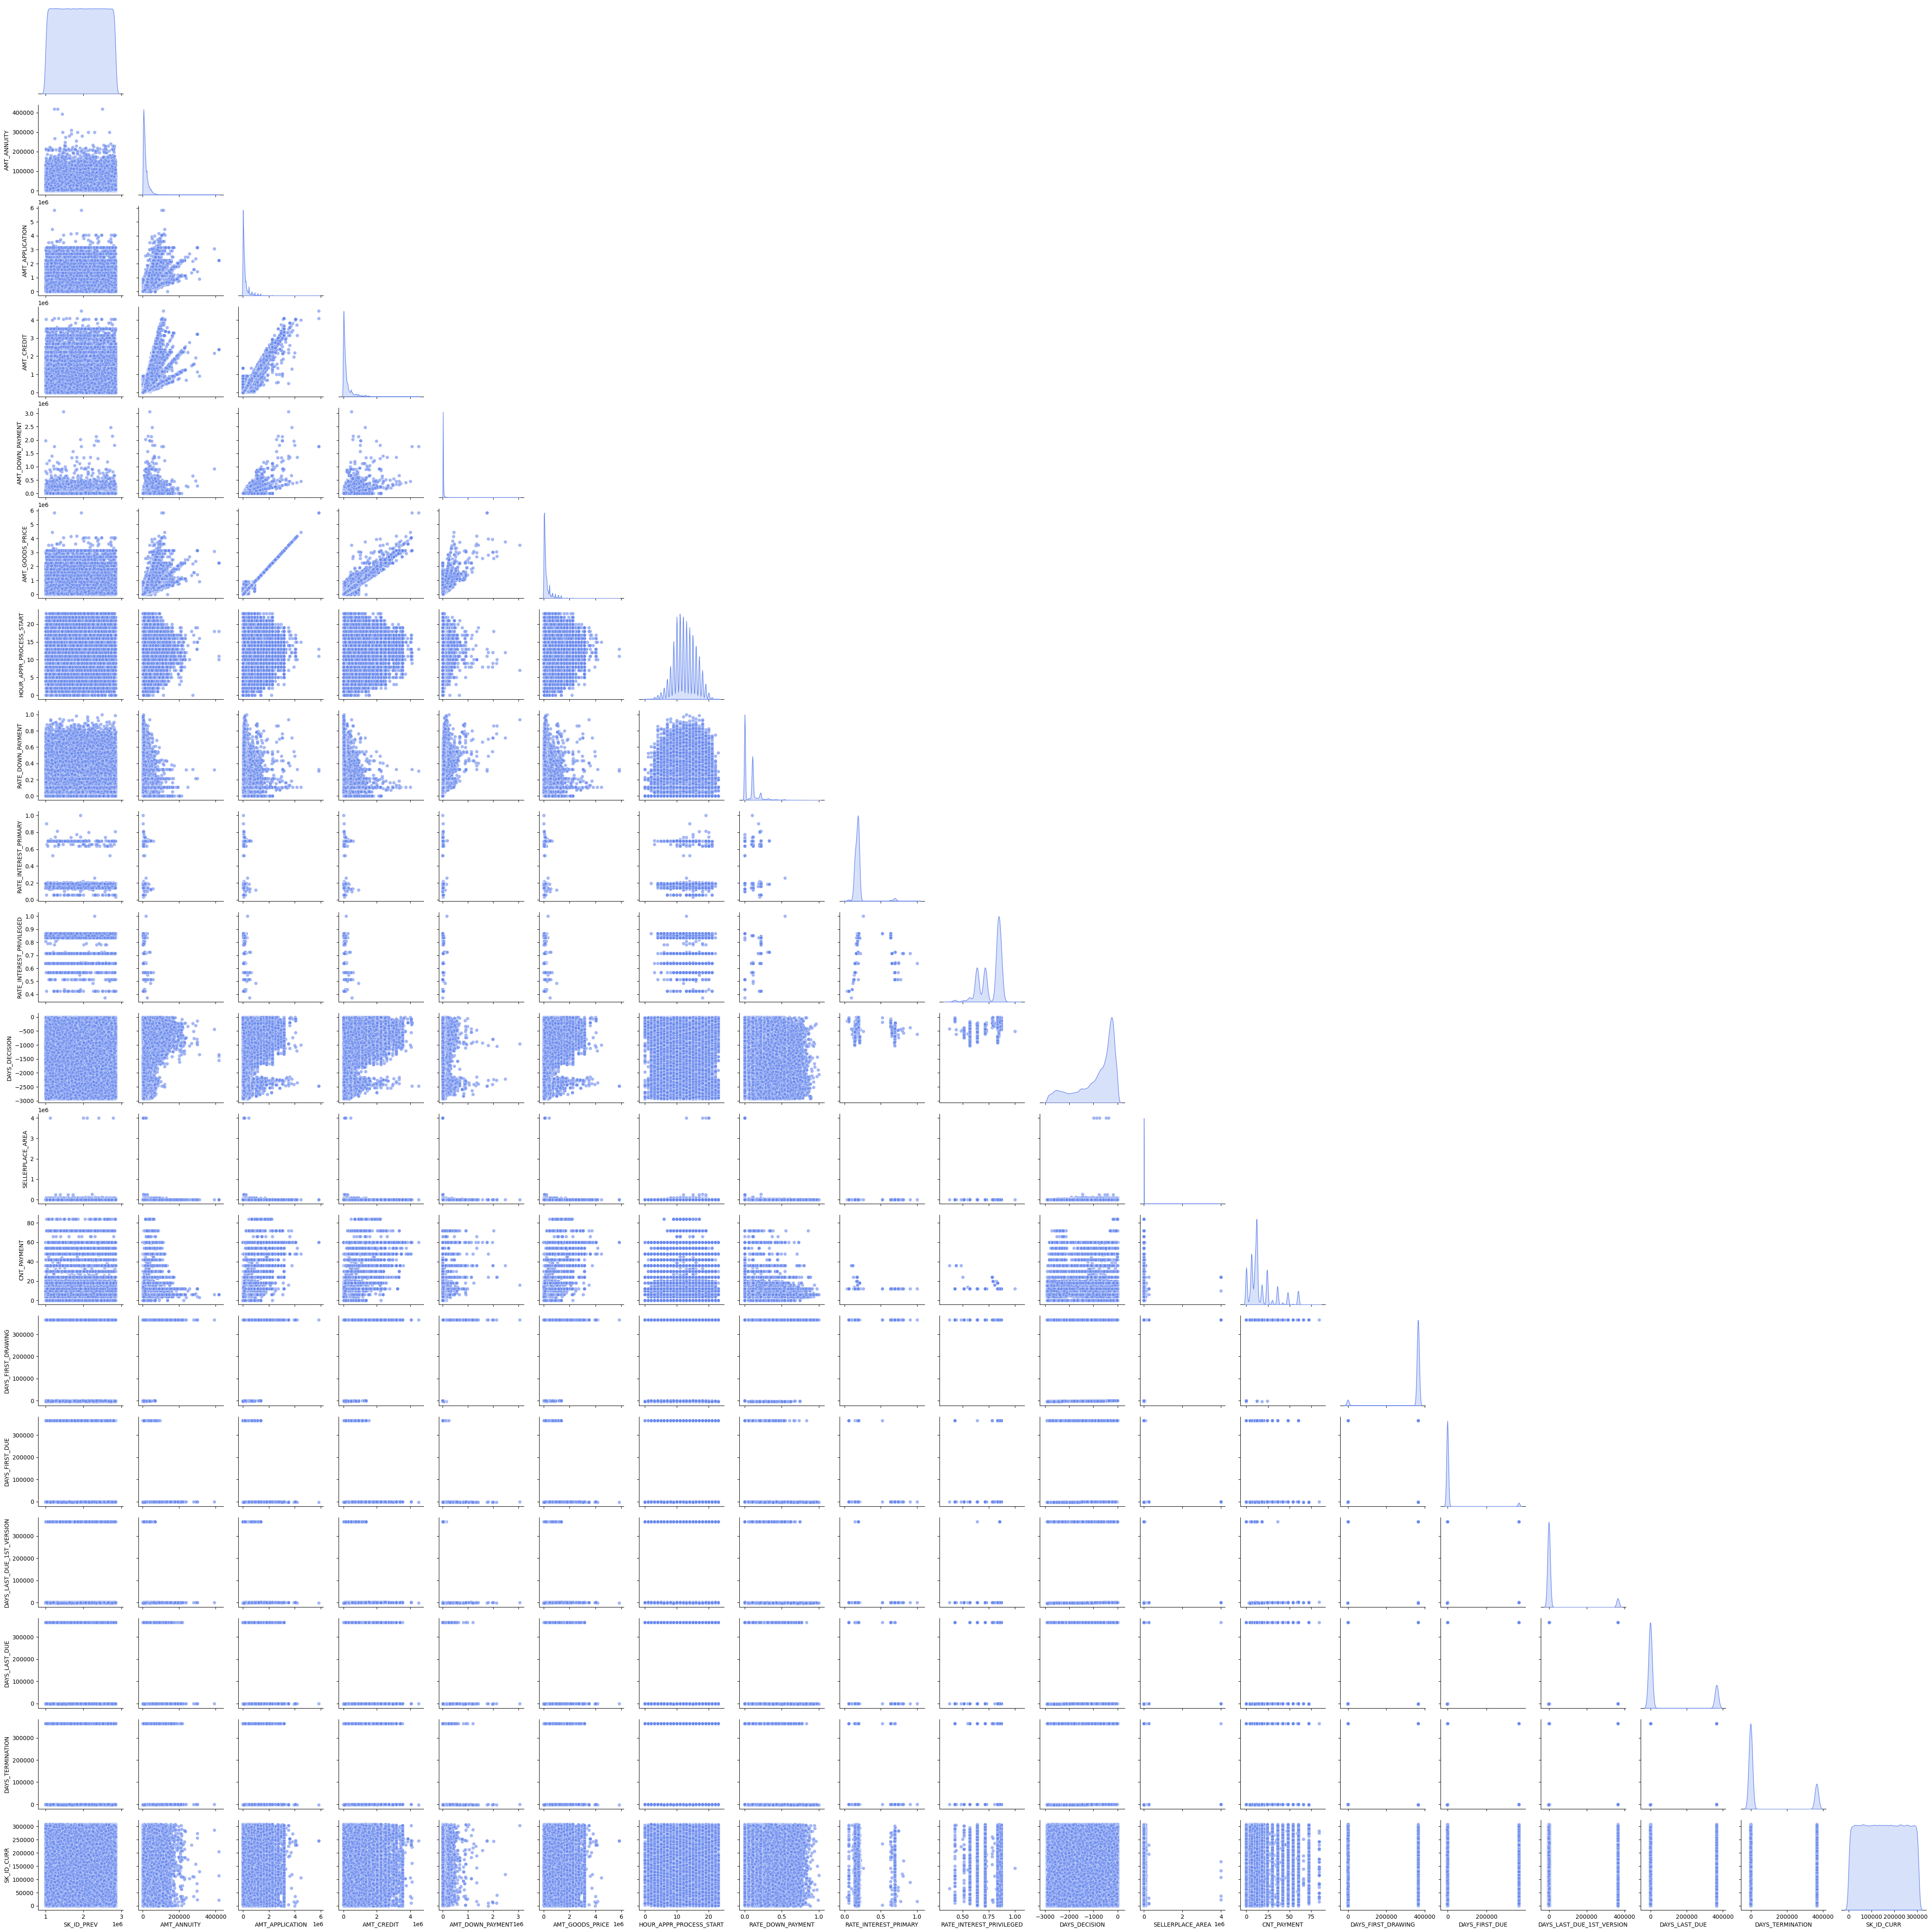

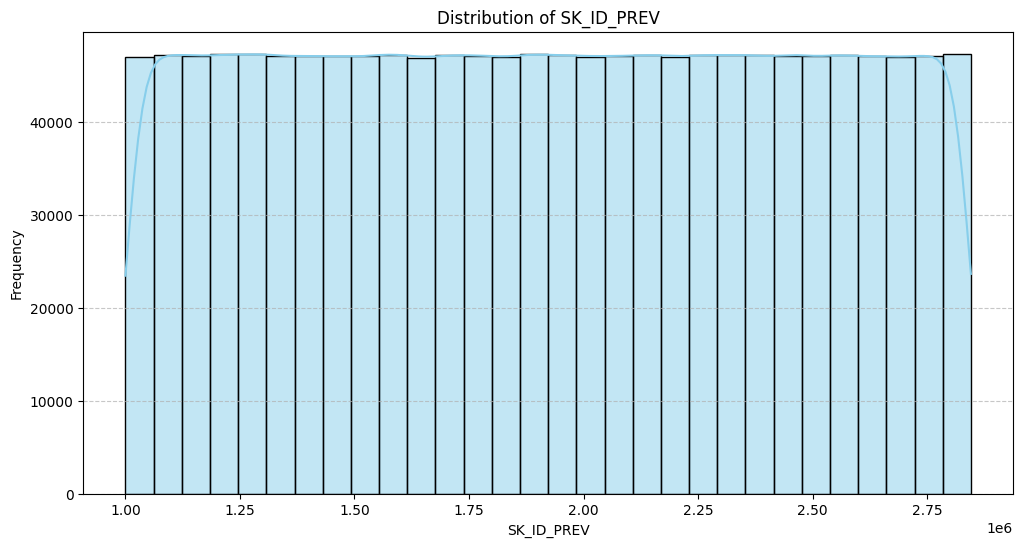

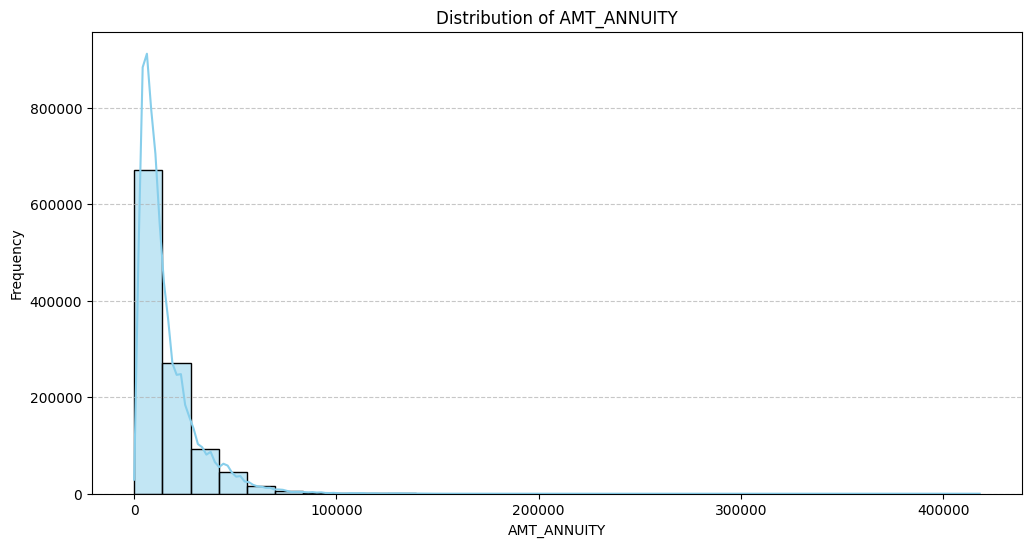

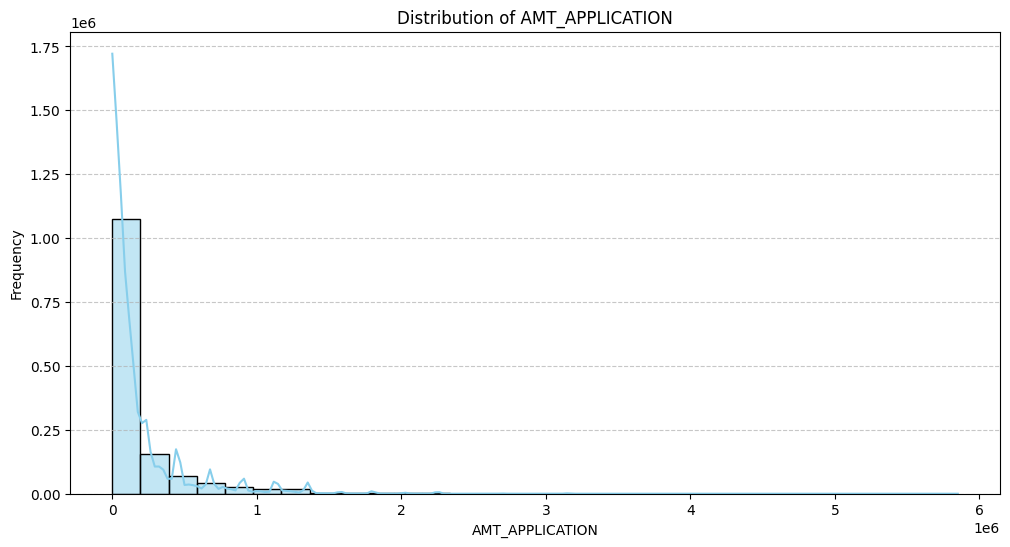

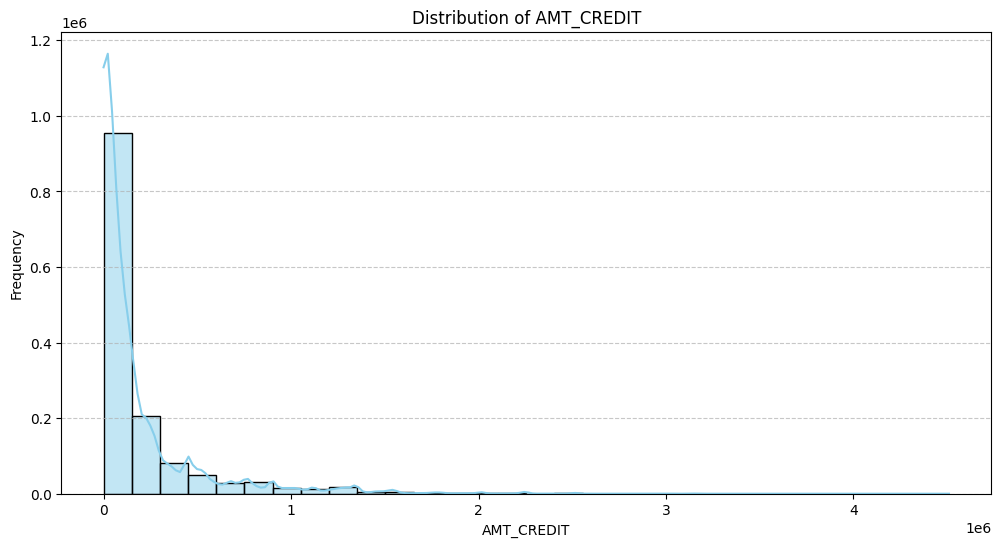

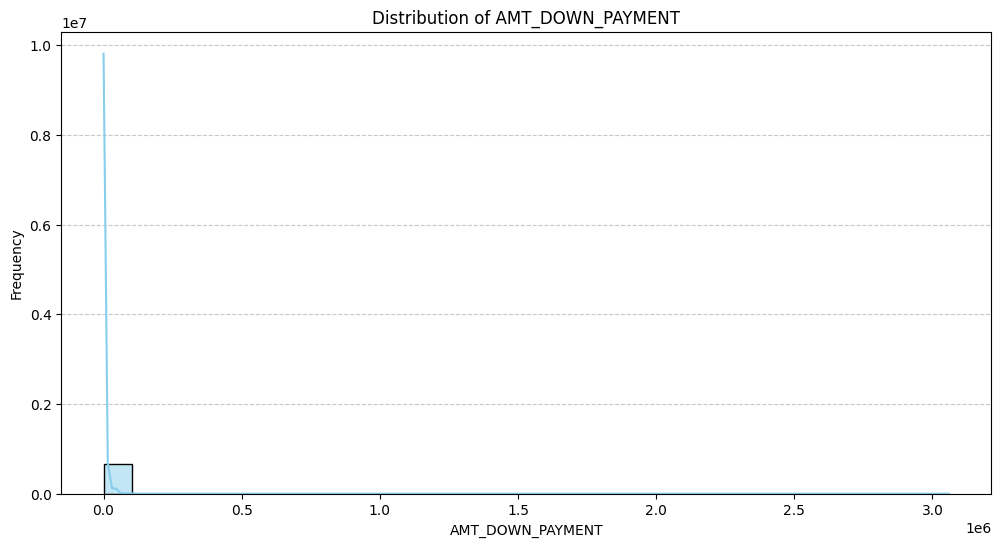

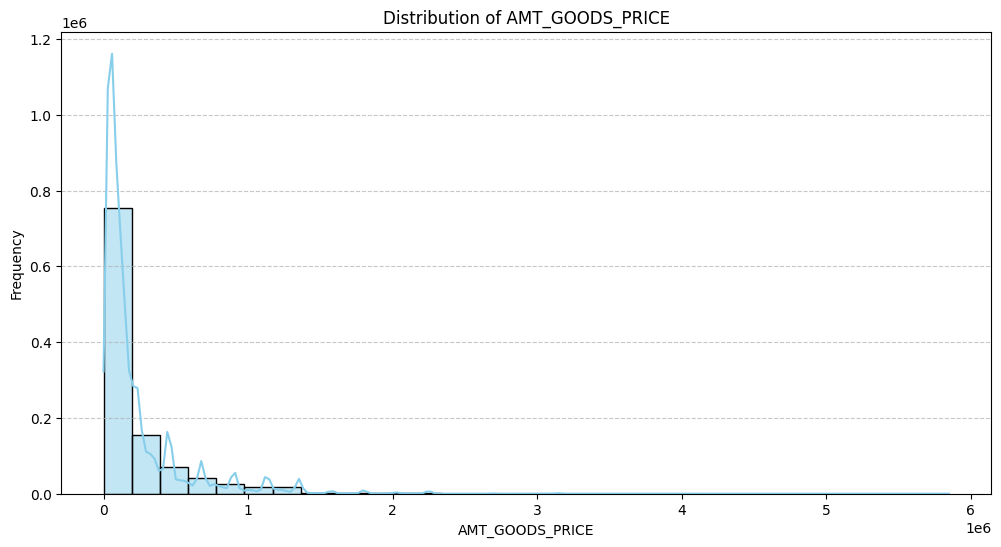

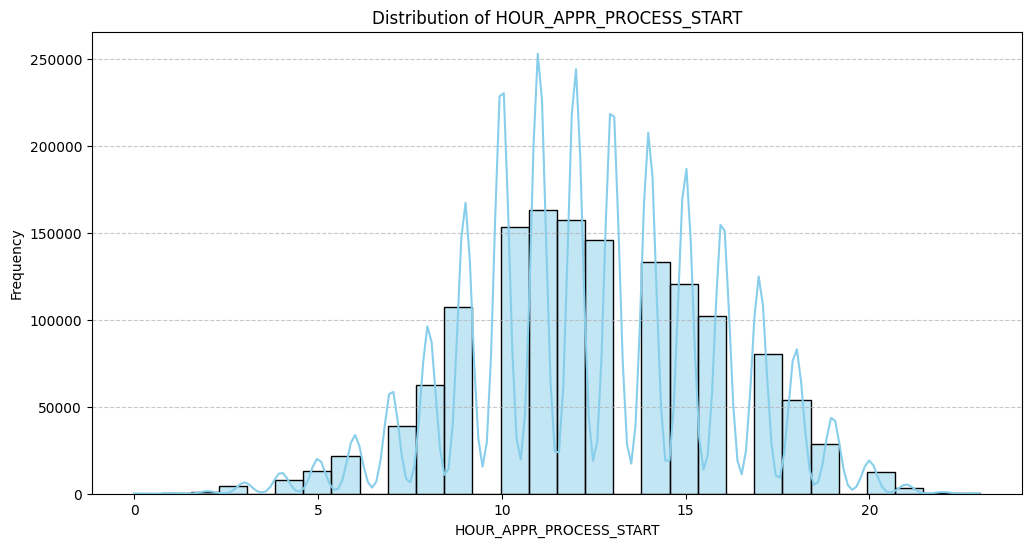

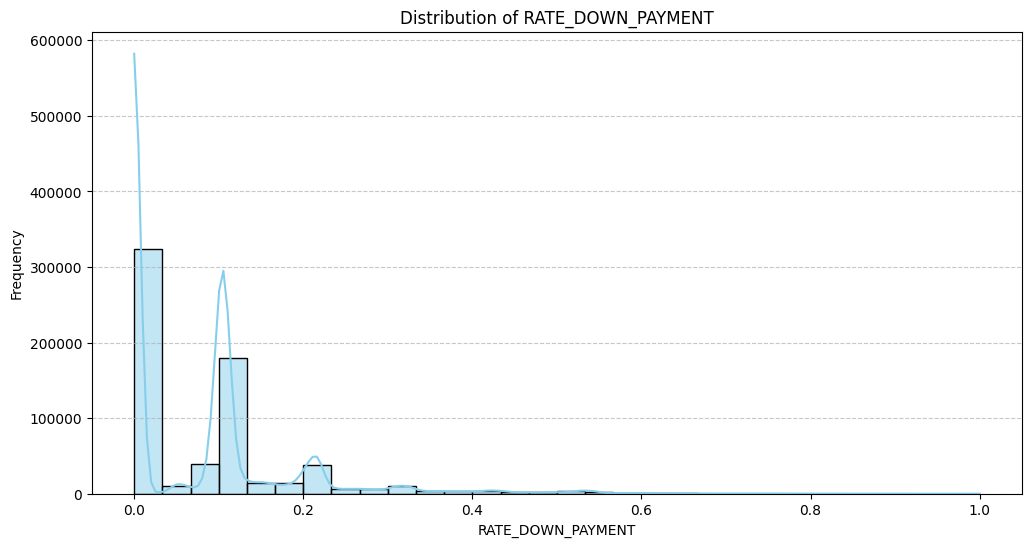

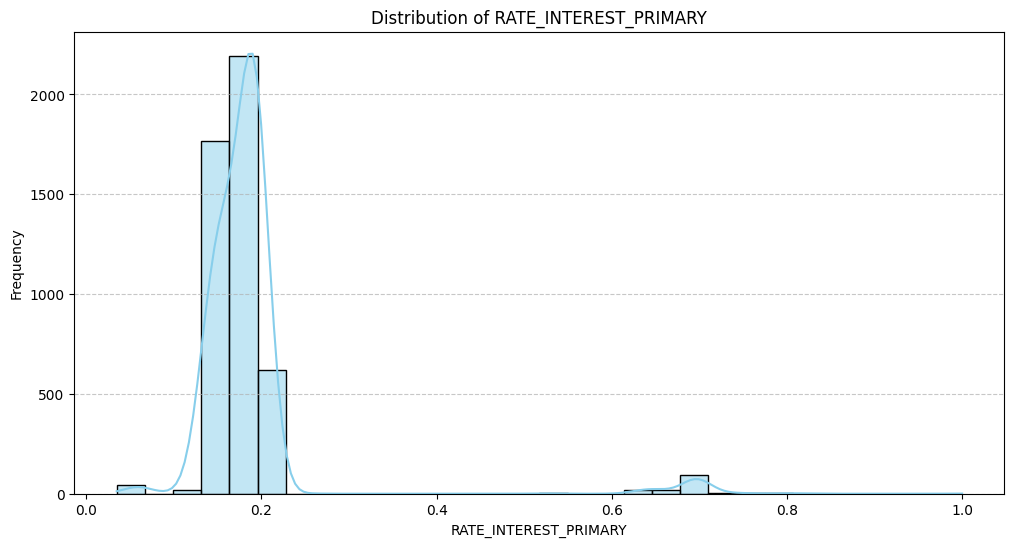

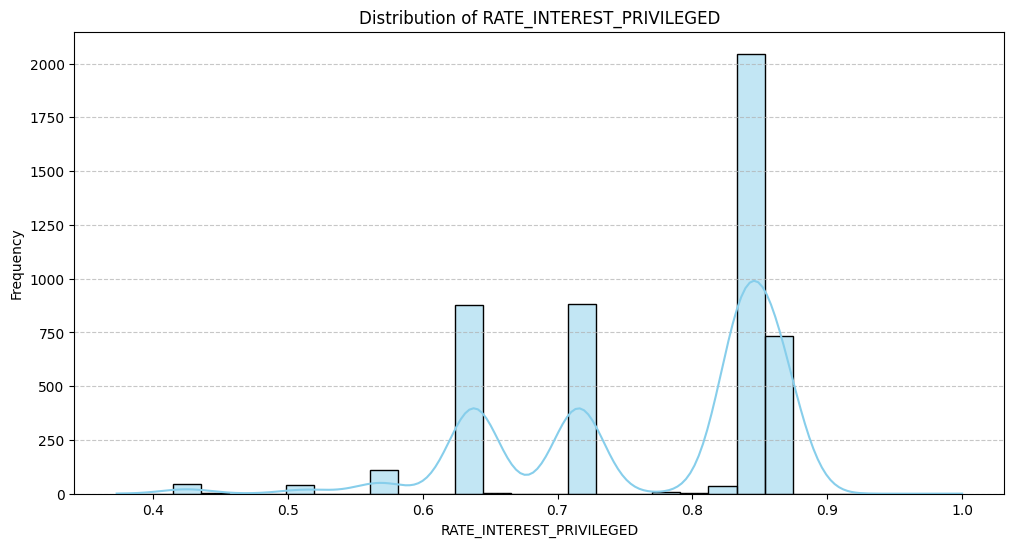

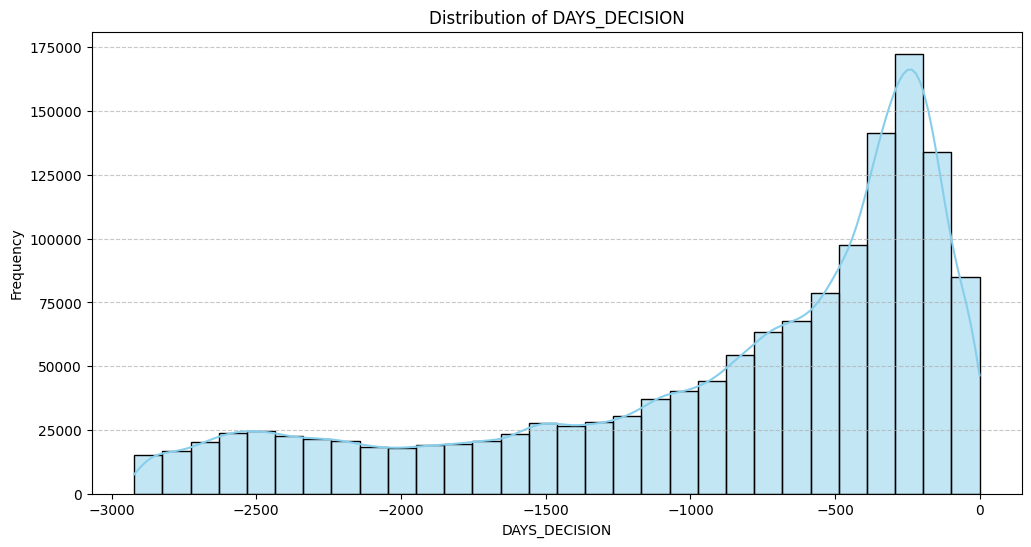

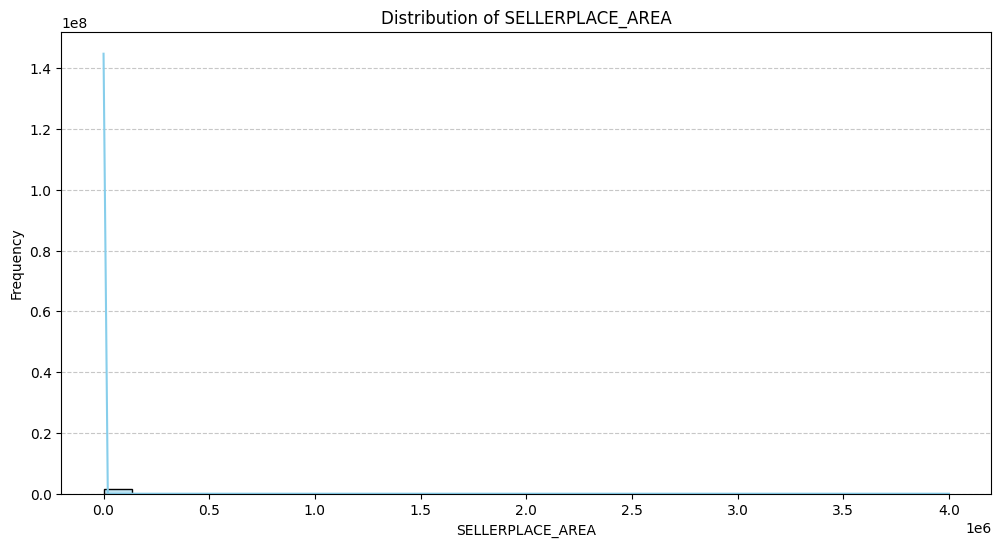

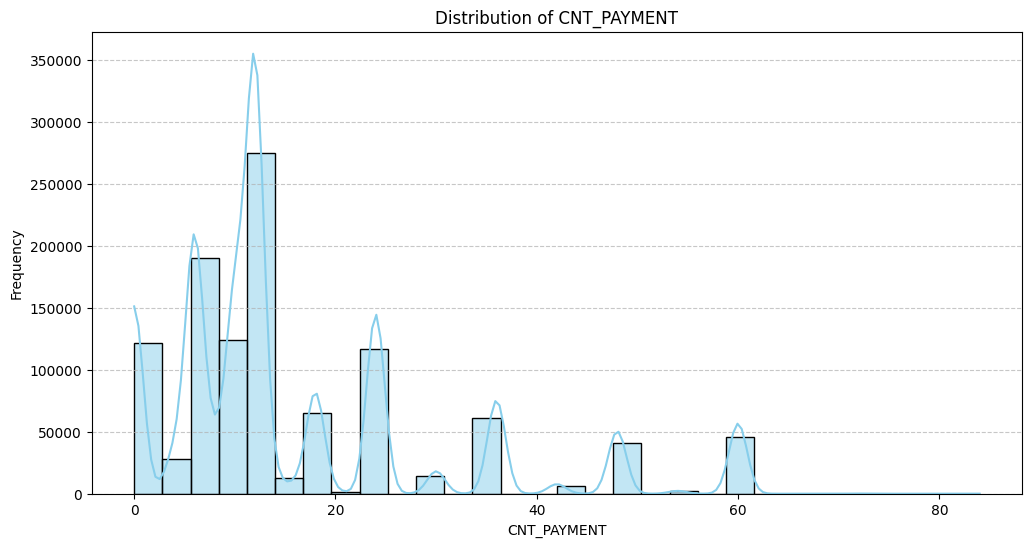

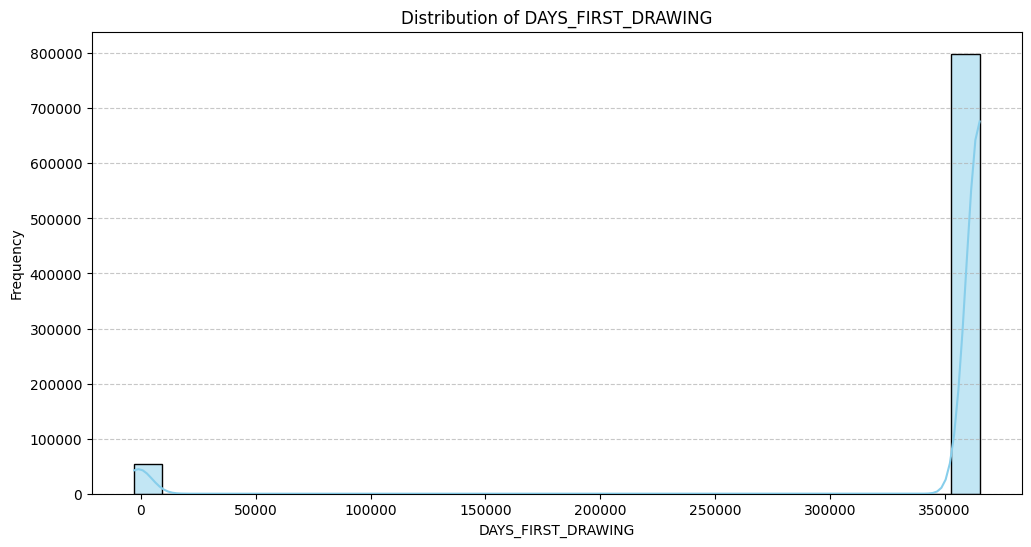

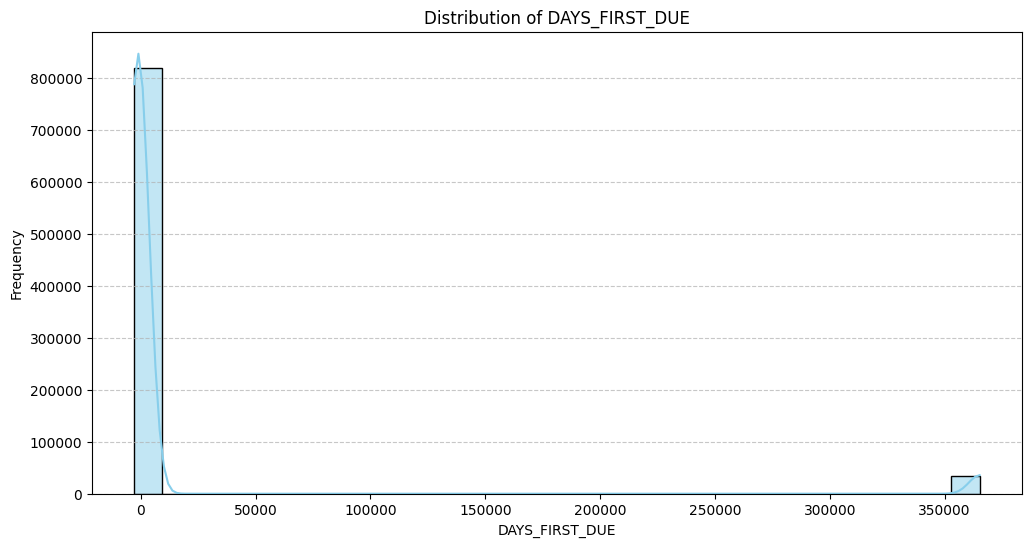

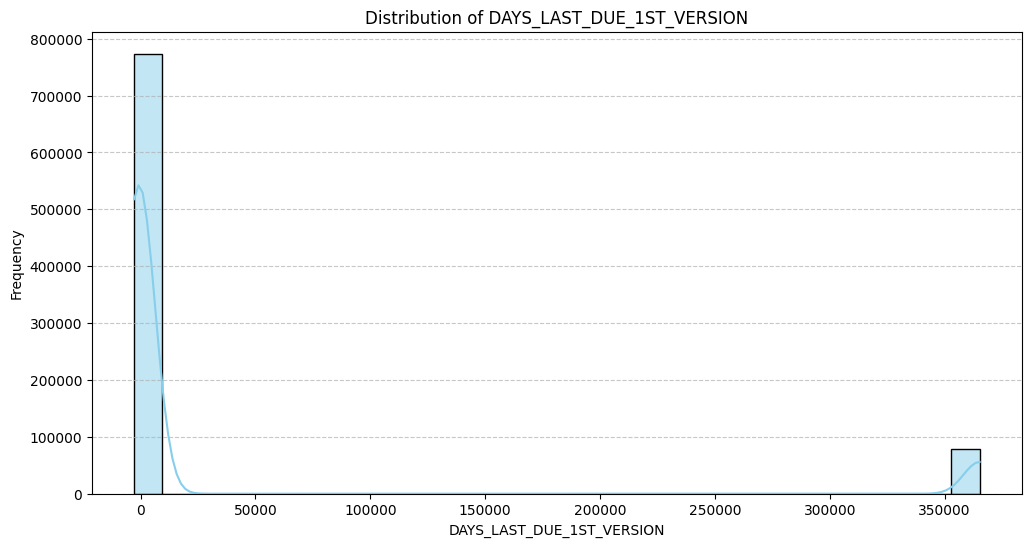

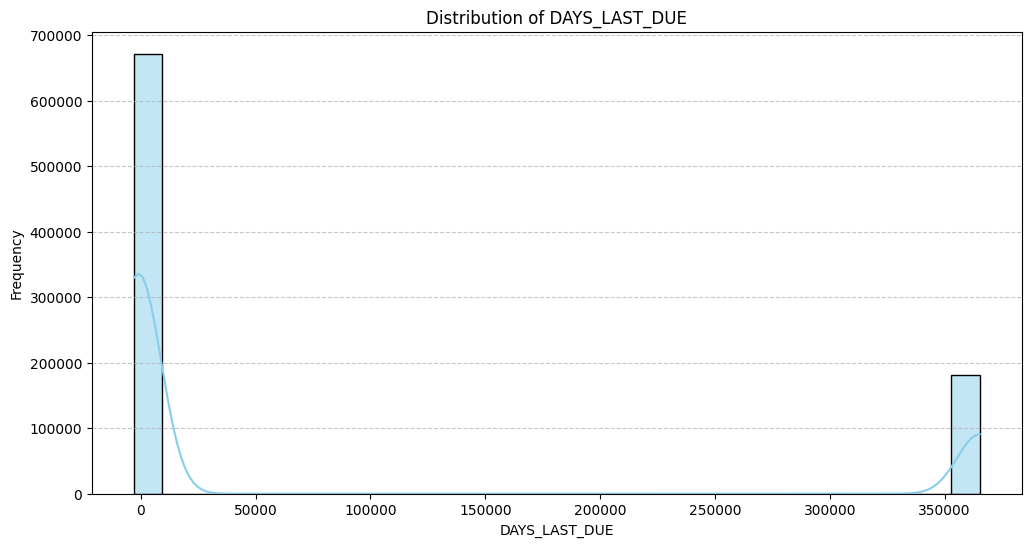

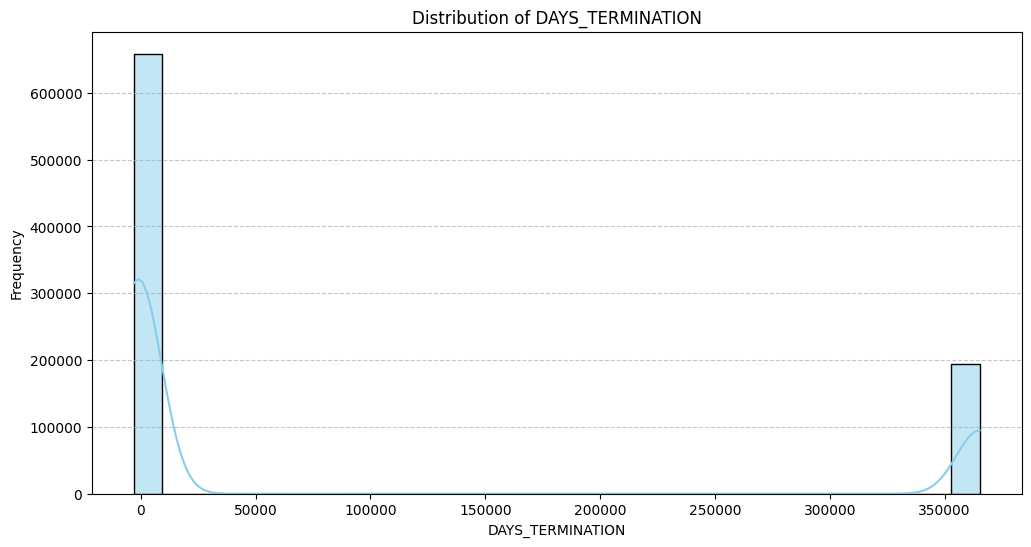

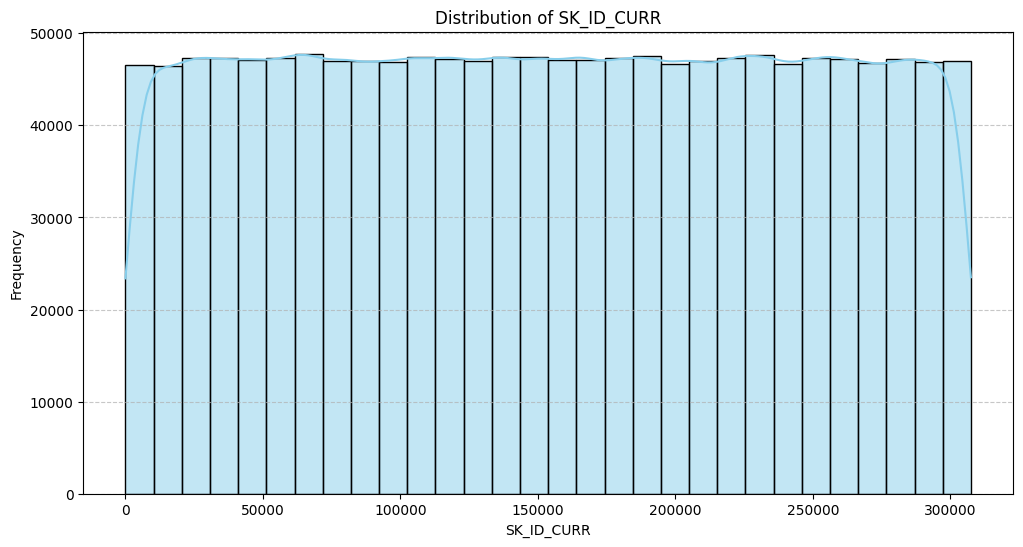

In [9]:
analyze_numeric_relationships(prev_app)

DAY_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION: exist value 365243 (this may be due to data entry error)

In DAY_FIRST_DRAWING columns: The majority of the values are 365243, which might be caused by the data entry process. Therefore, the distribution of NaN values in the DAY_FIRST_DRAWING column is very large

In [10]:
prev_app.columns

Index(['SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'SK_ID_CURR', 'TARGET'],
      dtype='object')

In [11]:
list_train_col = ['NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION',
       'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

## Relationship with TARGET

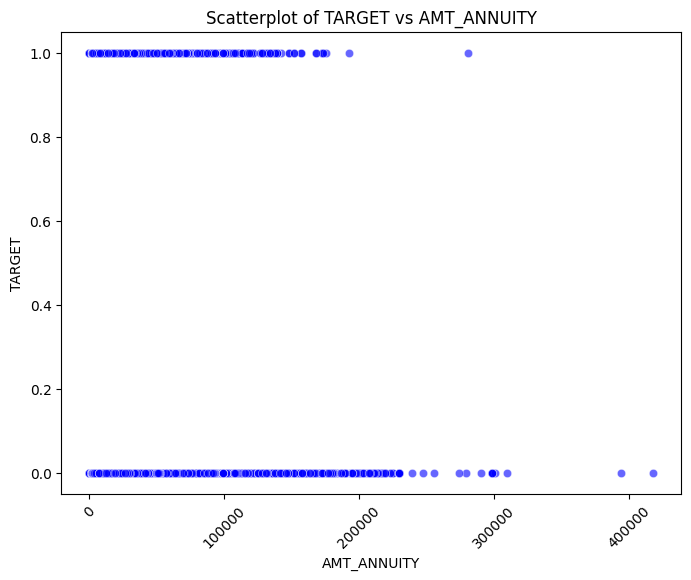

Insufficient data in one of the groups for AMT_ANNUITY. Skipping...


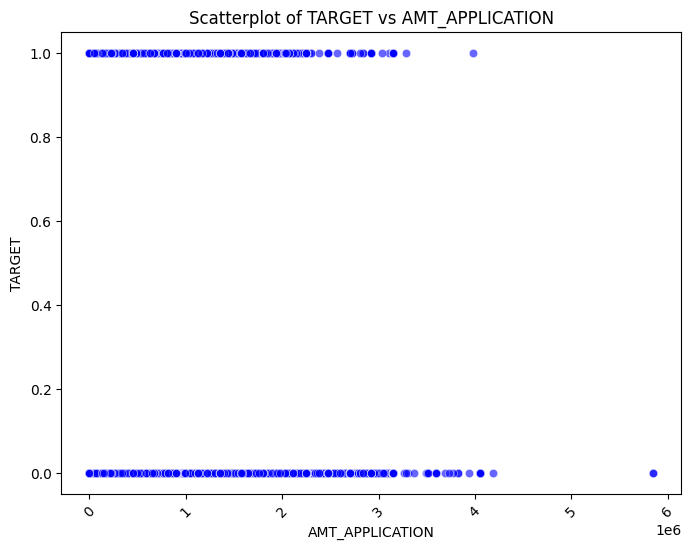

Insufficient data in one of the groups for AMT_APPLICATION. Skipping...


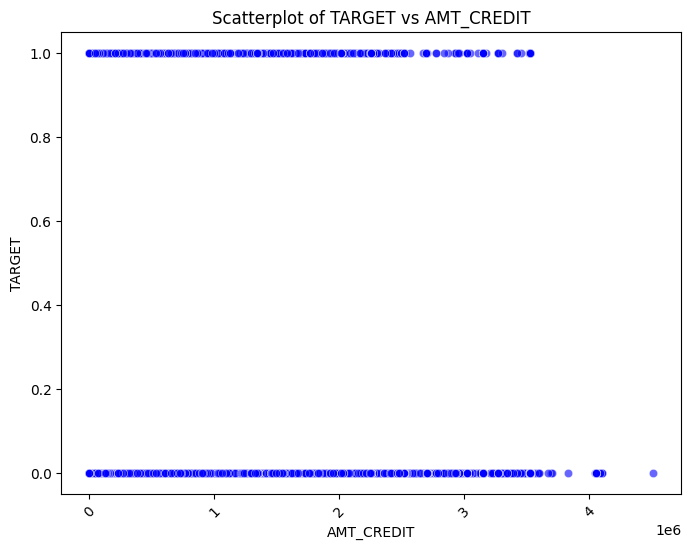

Insufficient data in one of the groups for AMT_CREDIT. Skipping...


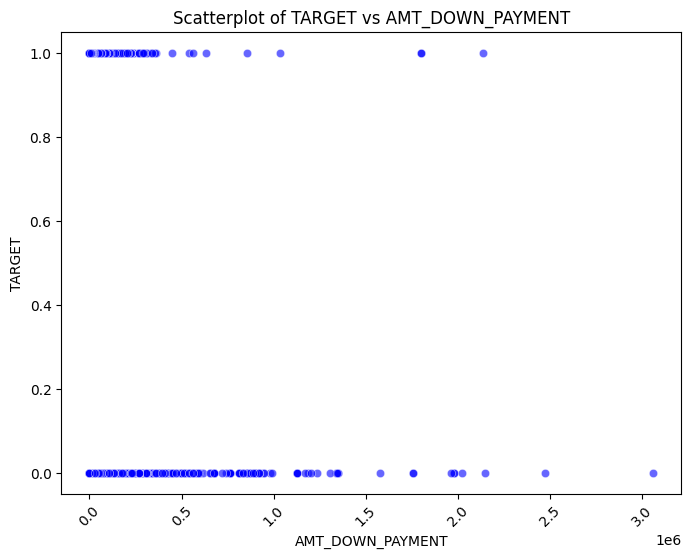

Insufficient data in one of the groups for AMT_DOWN_PAYMENT. Skipping...


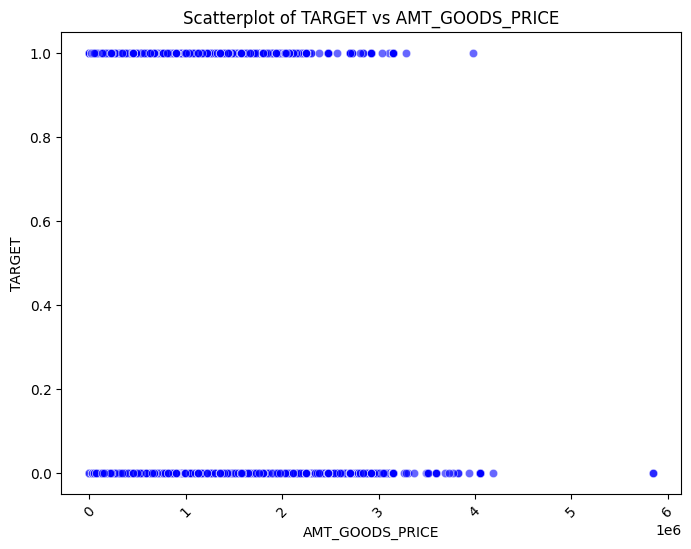

Insufficient data in one of the groups for AMT_GOODS_PRICE. Skipping...


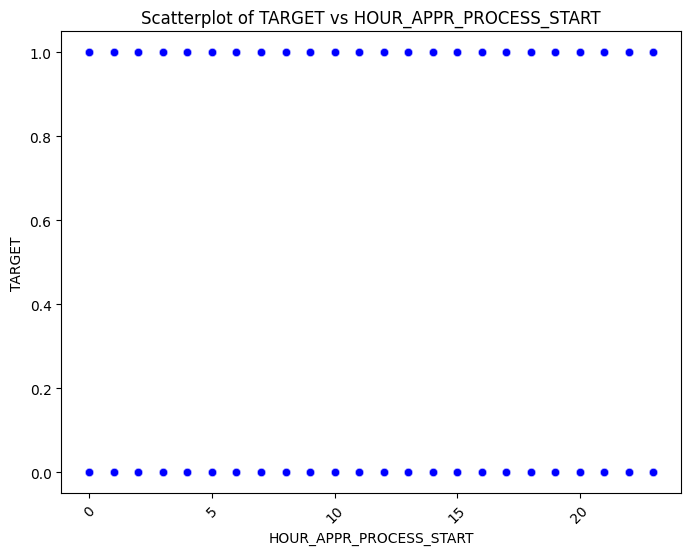

Insufficient data in one of the groups for HOUR_APPR_PROCESS_START. Skipping...


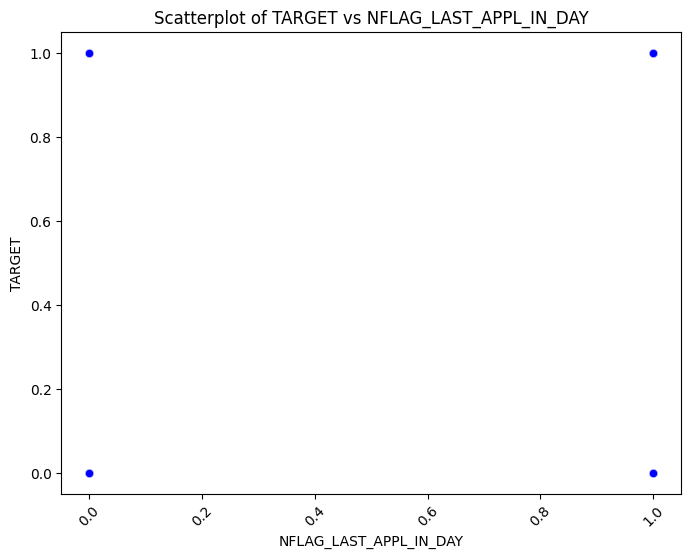

Insufficient data in one of the groups for NFLAG_LAST_APPL_IN_DAY. Skipping...


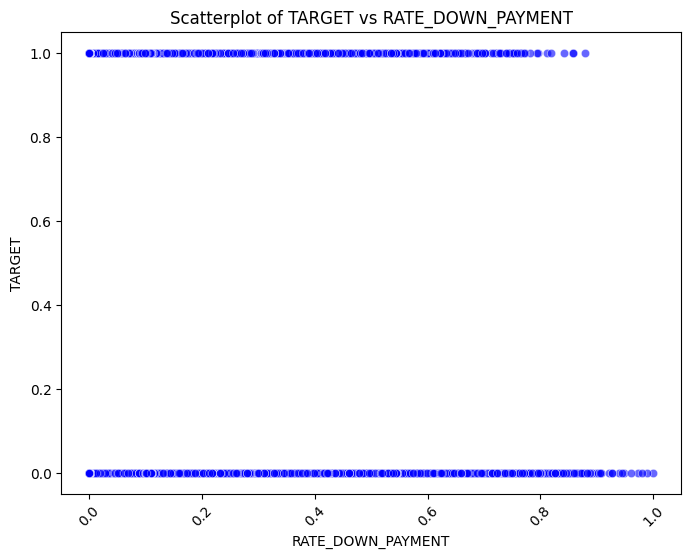

Insufficient data in one of the groups for RATE_DOWN_PAYMENT. Skipping...


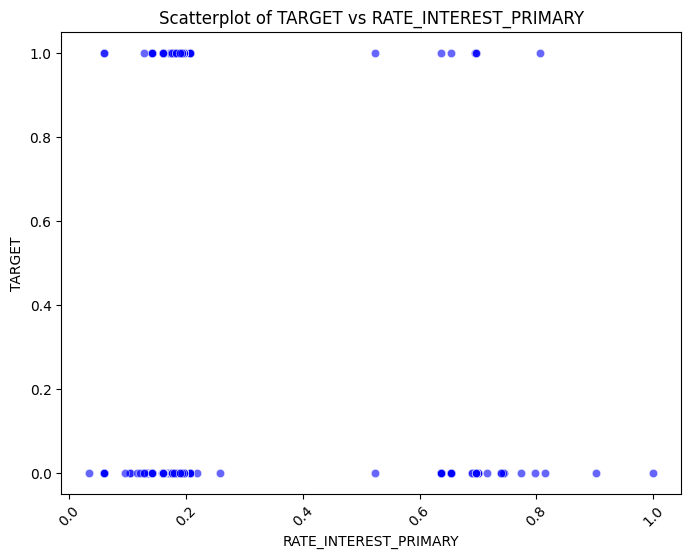

Insufficient data in one of the groups for RATE_INTEREST_PRIMARY. Skipping...


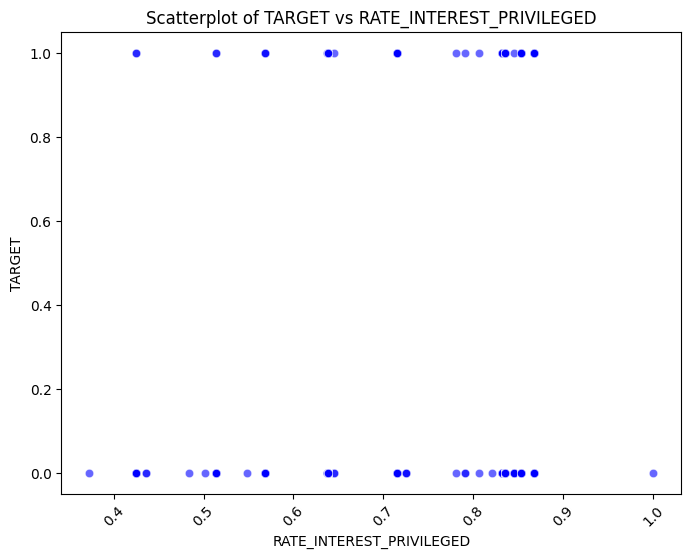

Insufficient data in one of the groups for RATE_INTEREST_PRIVILEGED. Skipping...


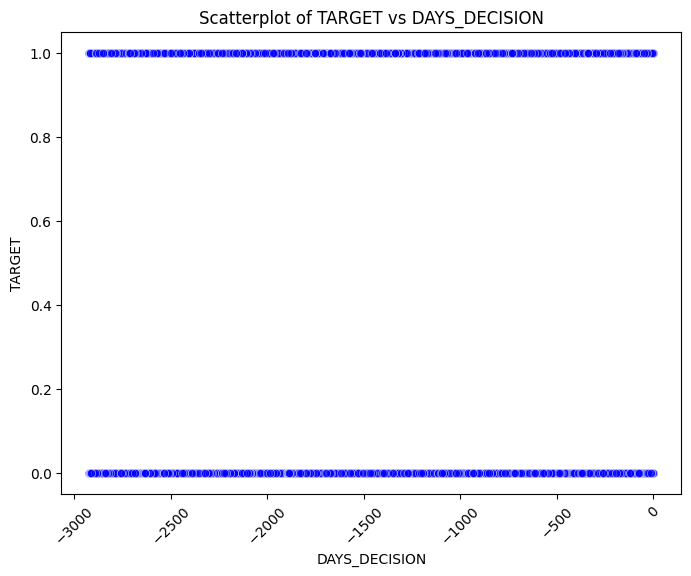

Insufficient data in one of the groups for DAYS_DECISION. Skipping...


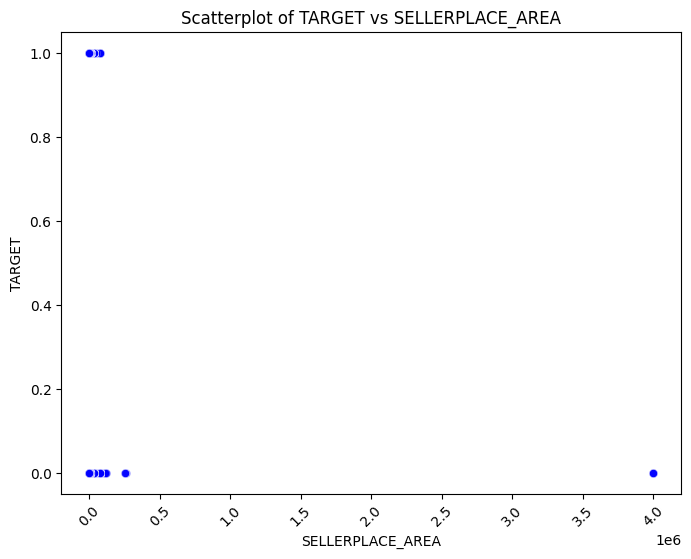

Insufficient data in one of the groups for SELLERPLACE_AREA. Skipping...


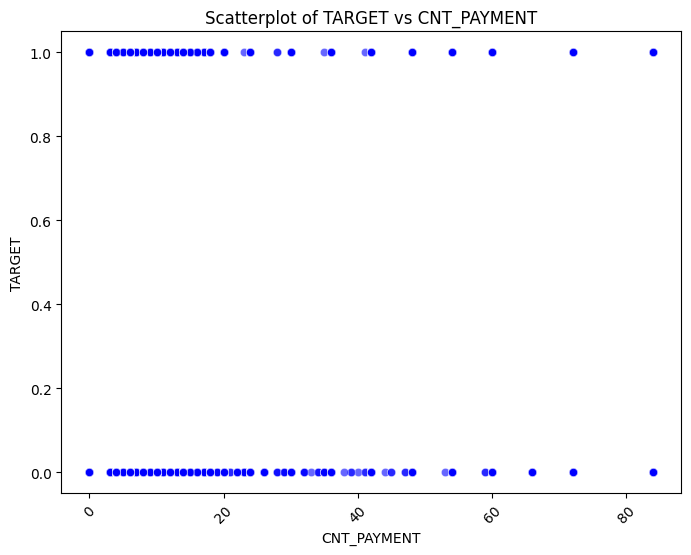

Insufficient data in one of the groups for CNT_PAYMENT. Skipping...


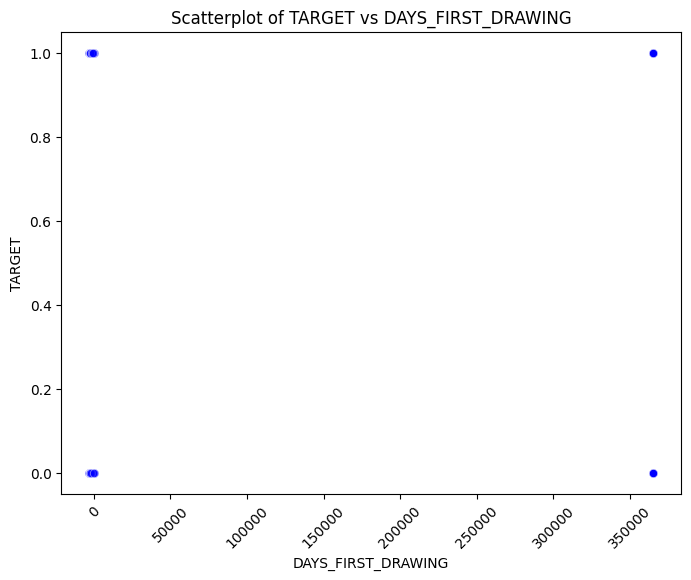

Insufficient data in one of the groups for DAYS_FIRST_DRAWING. Skipping...


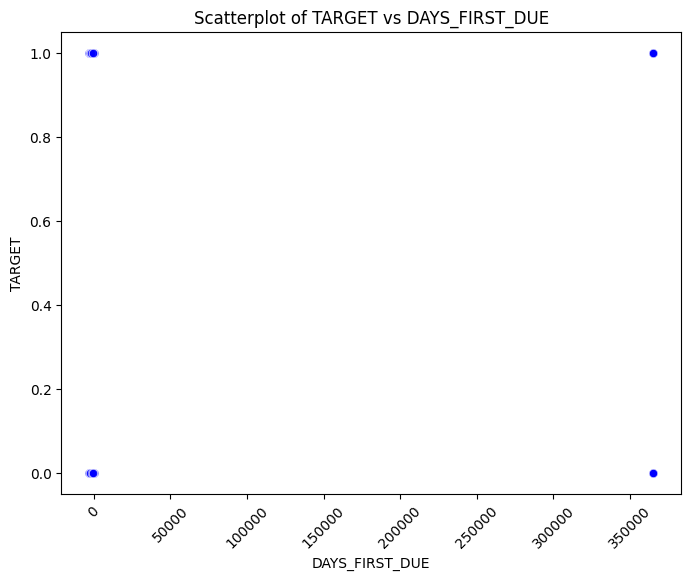

Insufficient data in one of the groups for DAYS_FIRST_DUE. Skipping...


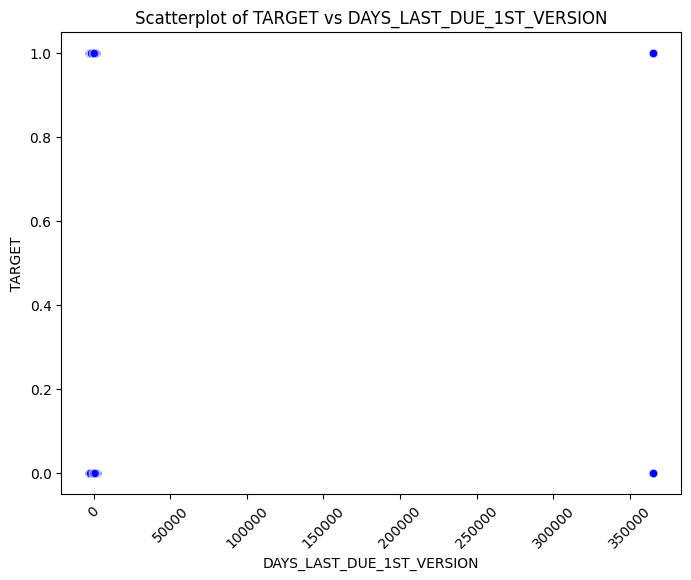

Insufficient data in one of the groups for DAYS_LAST_DUE_1ST_VERSION. Skipping...


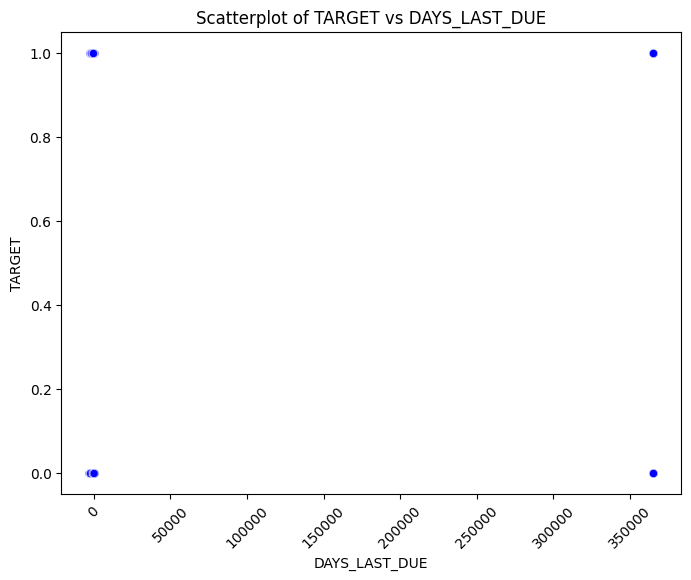

Insufficient data in one of the groups for DAYS_LAST_DUE. Skipping...


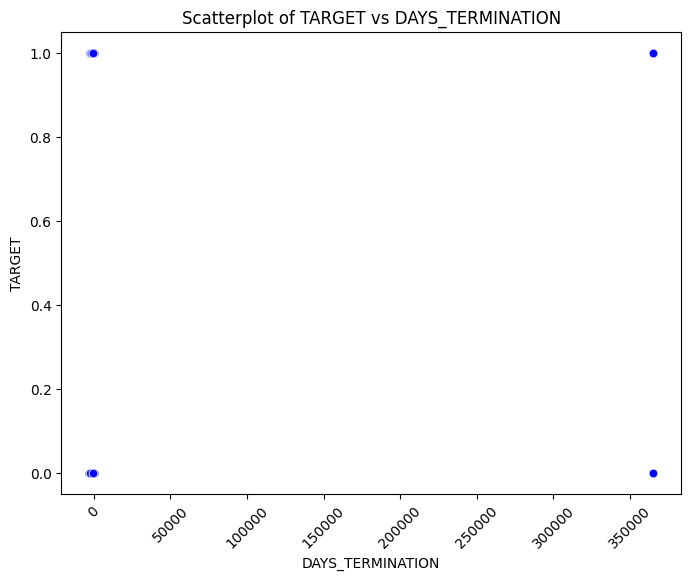

Insufficient data in one of the groups for DAYS_TERMINATION. Skipping...


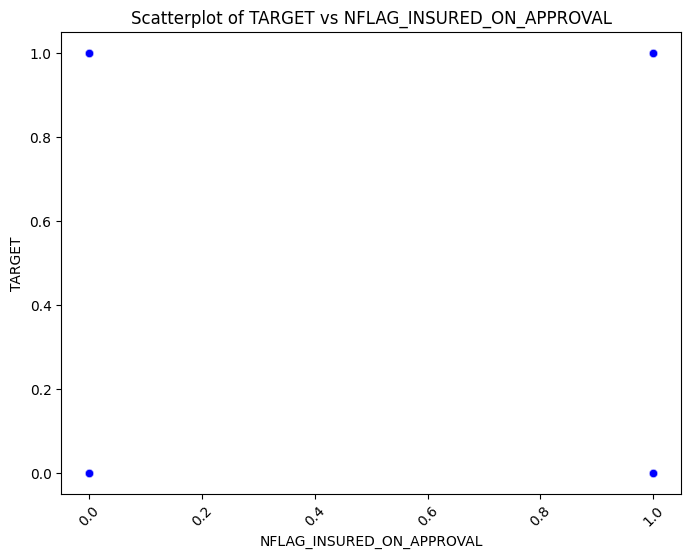

Insufficient data in one of the groups for NFLAG_INSURED_ON_APPROVAL. Skipping...


d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


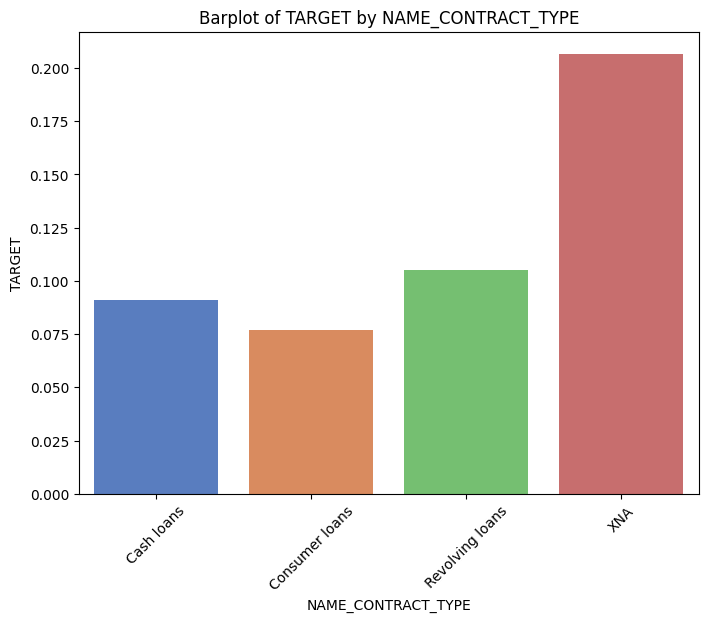

Chi-square Test Results for NAME_CONTRACT_TYPE vs TARGET: Chi2: 1289.5830, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


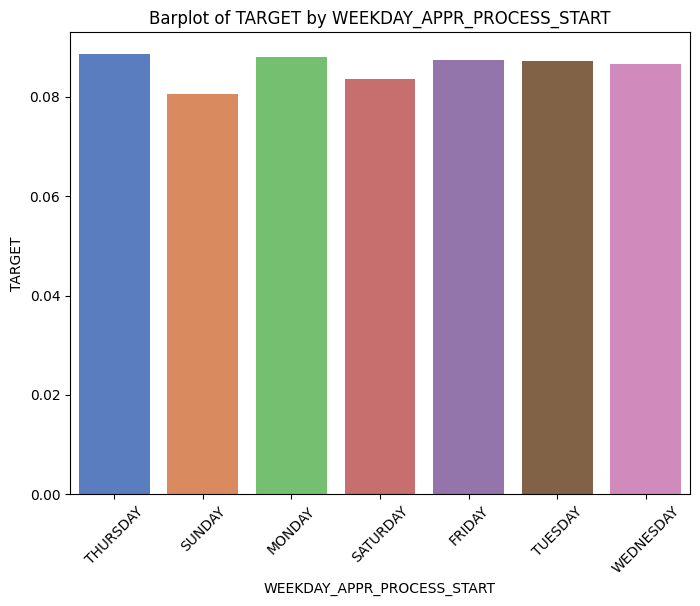

Chi-square Test Results for WEEKDAY_APPR_PROCESS_START vs TARGET: Chi2: 85.2341, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


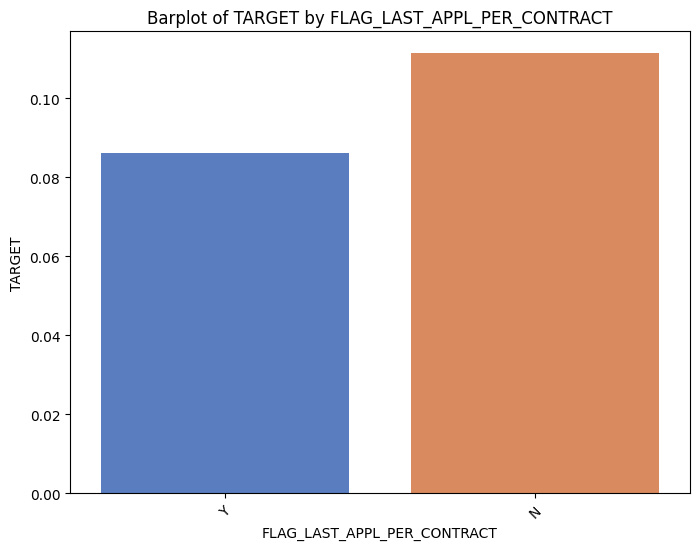

Chi-square Test Results for FLAG_LAST_APPL_PER_CONTRACT vs TARGET: Chi2: 47.0043, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


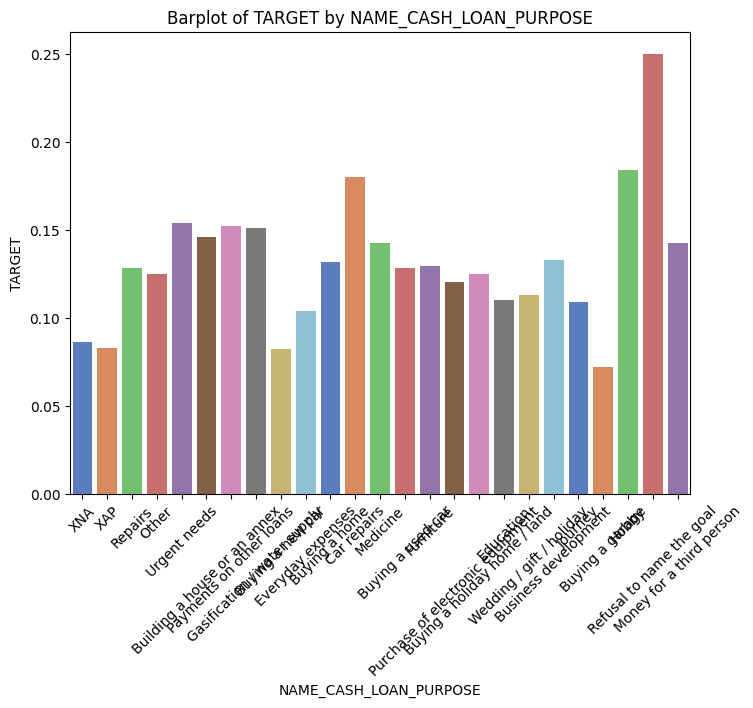

Chi-square Test Results for NAME_CASH_LOAN_PURPOSE vs TARGET: Chi2: 1424.4006, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


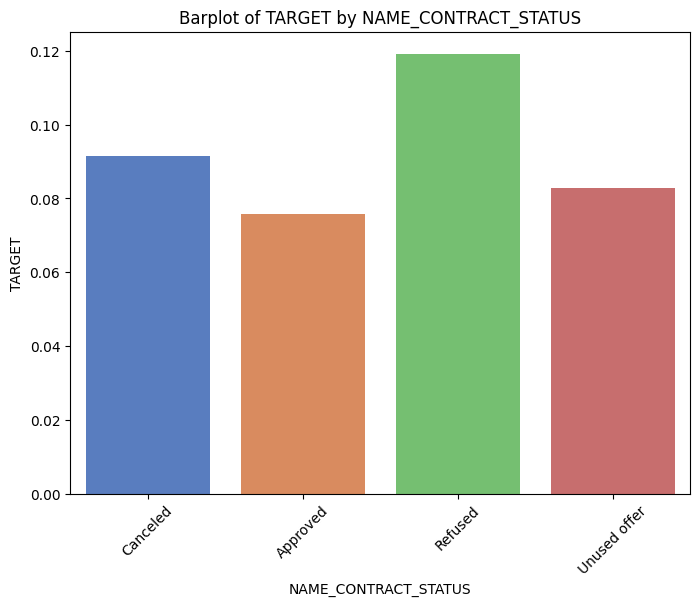

Chi-square Test Results for NAME_CONTRACT_STATUS vs TARGET: Chi2: 3745.9787, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


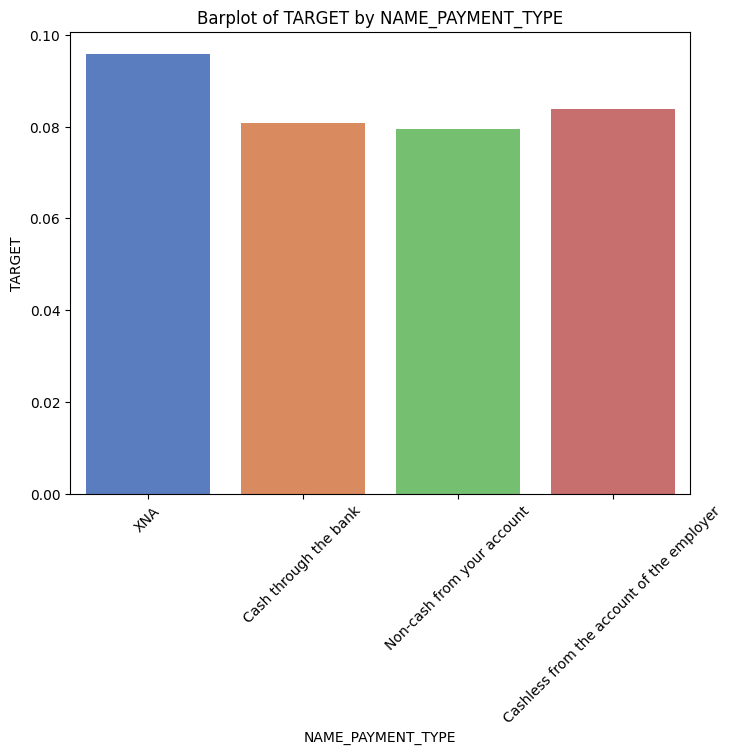

Chi-square Test Results for NAME_PAYMENT_TYPE vs TARGET: Chi2: 762.5354, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


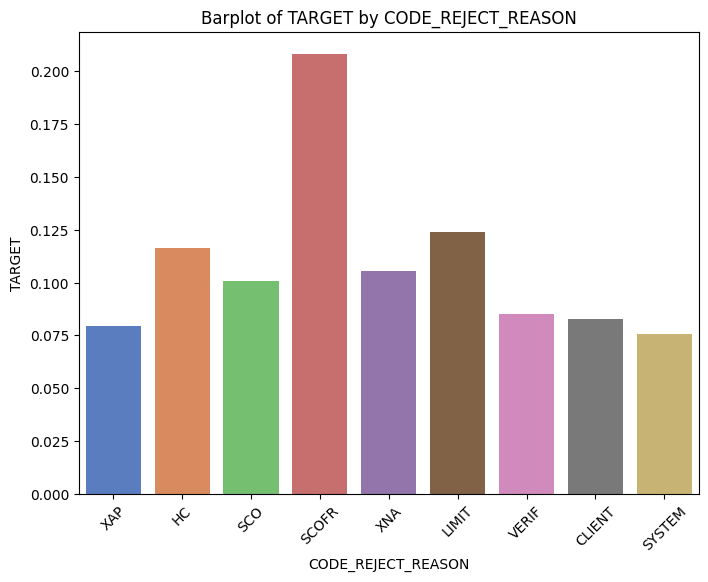

Chi-square Test Results for CODE_REJECT_REASON vs TARGET: Chi2: 4319.7836, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


Chi-square Test Results for NAME_TYPE_SUITE vs TARGET: Chi2: 154.2718, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


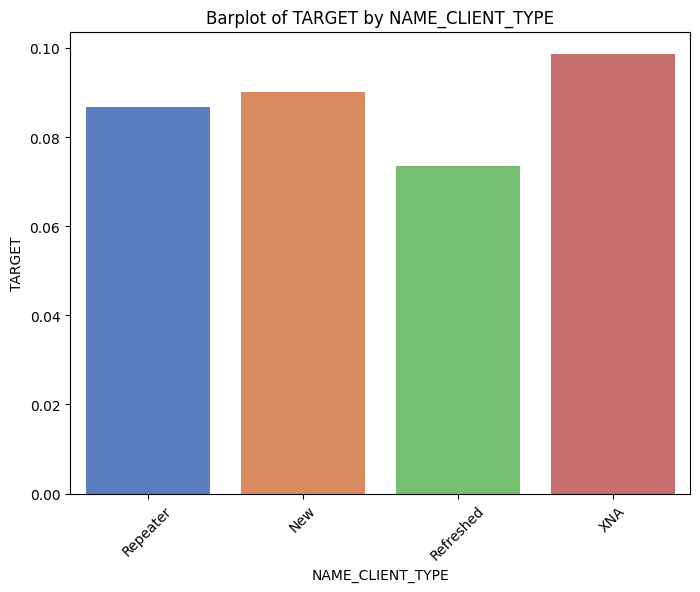

Chi-square Test Results for NAME_CLIENT_TYPE vs TARGET: Chi2: 232.5911, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


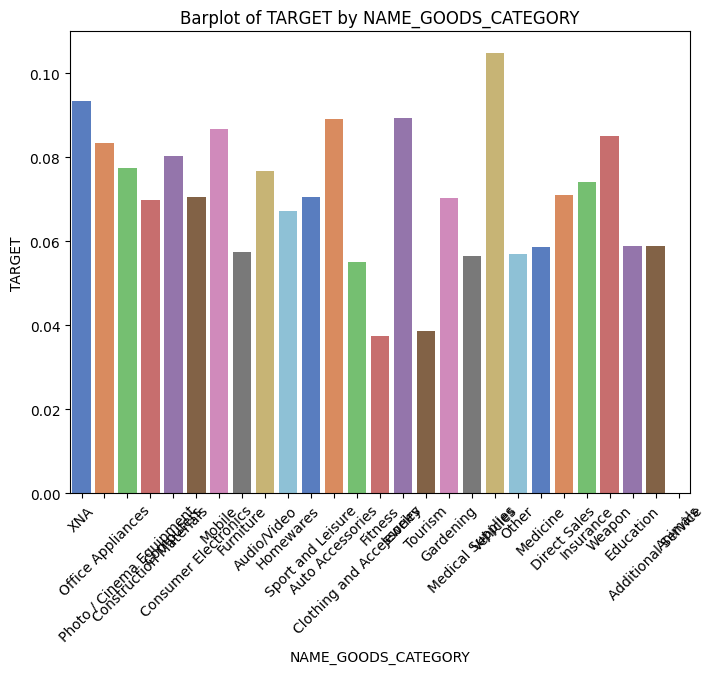

Chi-square Test Results for NAME_GOODS_CATEGORY vs TARGET: Chi2: 1587.1416, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


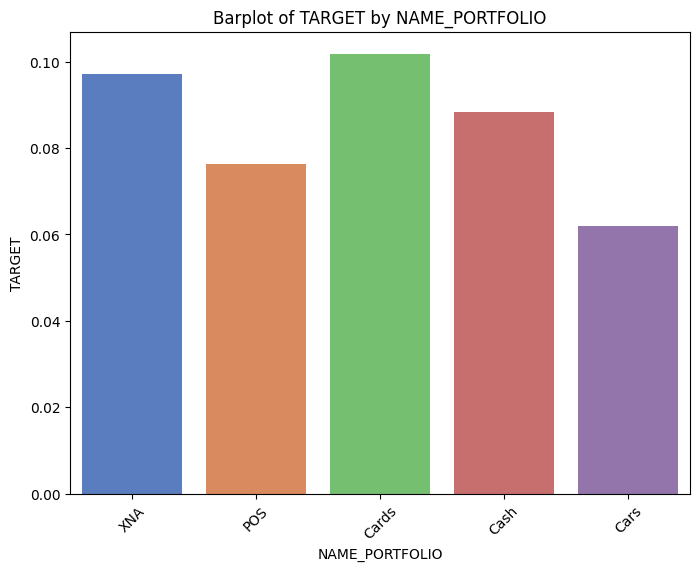

Chi-square Test Results for NAME_PORTFOLIO vs TARGET: Chi2: 1288.3009, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


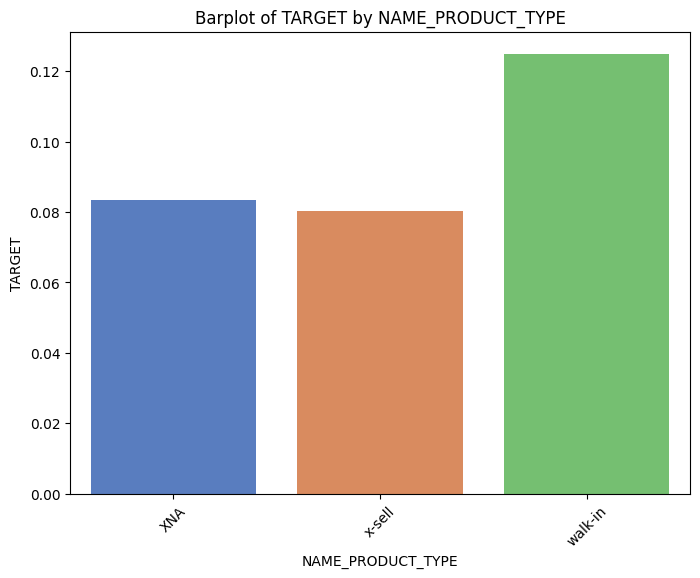

Chi-square Test Results for NAME_PRODUCT_TYPE vs TARGET: Chi2: 2151.8821, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


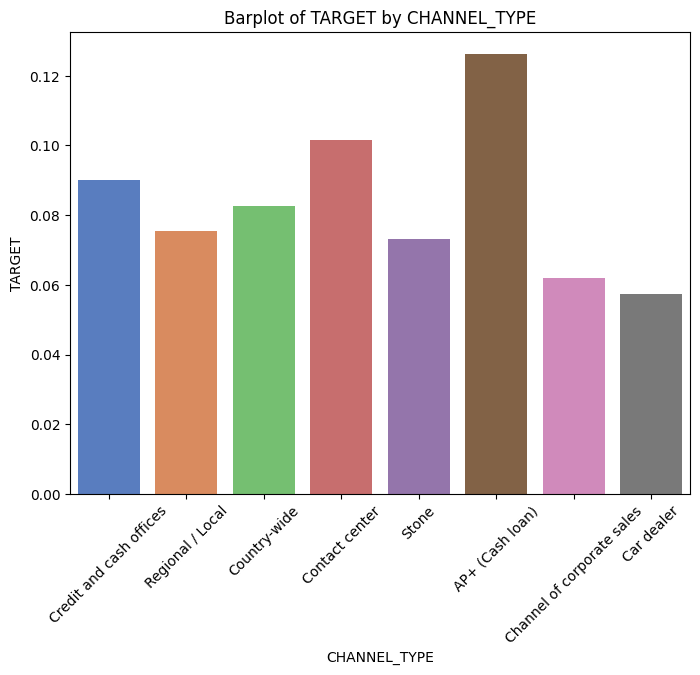

Chi-square Test Results for CHANNEL_TYPE vs TARGET: Chi2: 1542.1231, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


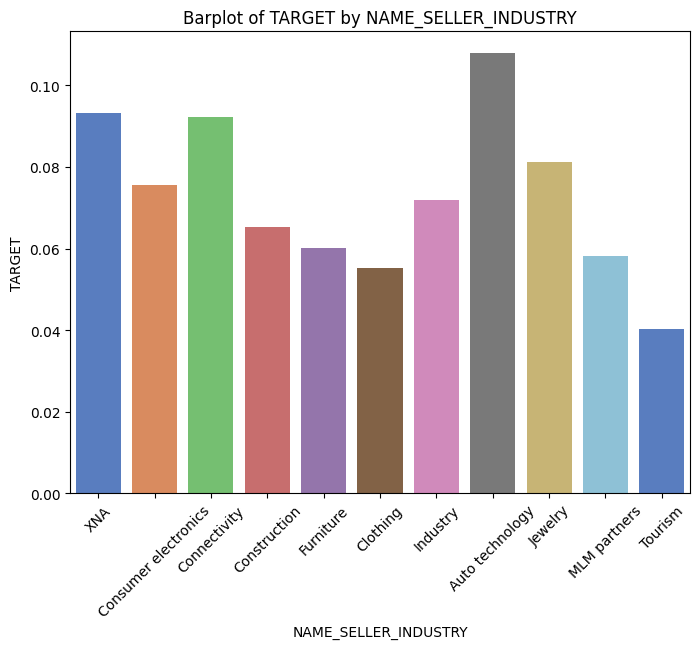

Chi-square Test Results for NAME_SELLER_INDUSTRY vs TARGET: Chi2: 1550.2338, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


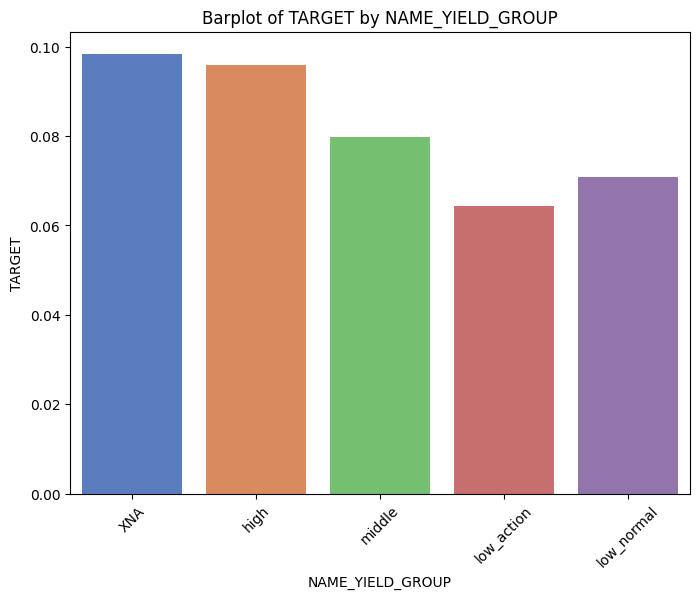

Chi-square Test Results for NAME_YIELD_GROUP vs TARGET: Chi2: 2124.2011, p-value: 0.0000
There is a statistically significant relationship.



d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")
d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:488: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y=target_col, data=sample_data, ci=None, palette="muted")


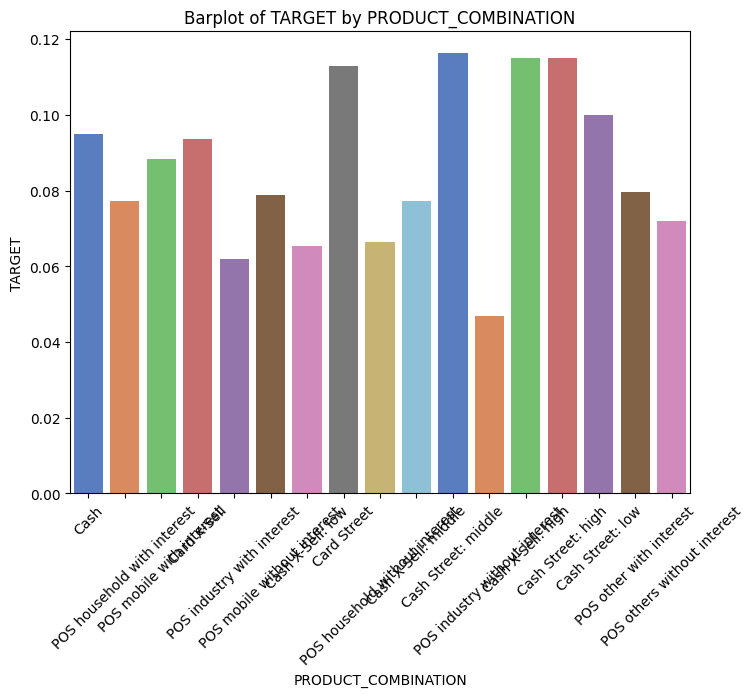

Chi-square Test Results for PRODUCT_COMBINATION vs TARGET: Chi2: 3856.7014, p-value: 0.0000
There is a statistically significant relationship.



In [12]:
analyze_target_relationship(prev_app, 'TARGET', list_train_col)

## Outlier


=== Outlier Detection and Handling ===


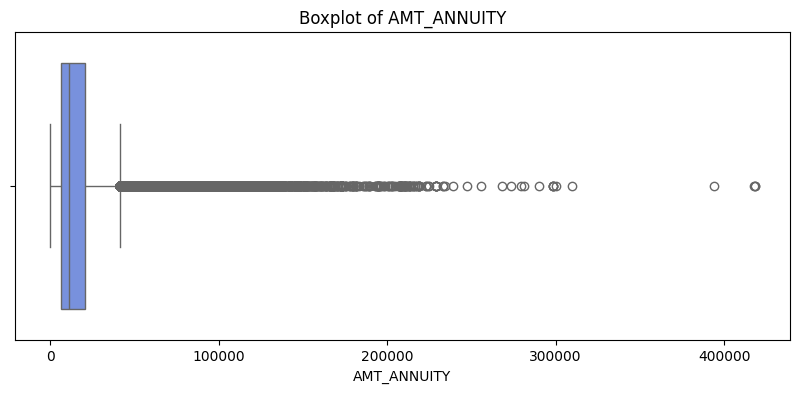

Outliers detected in column AMT_ANNUITY: 19574 rows


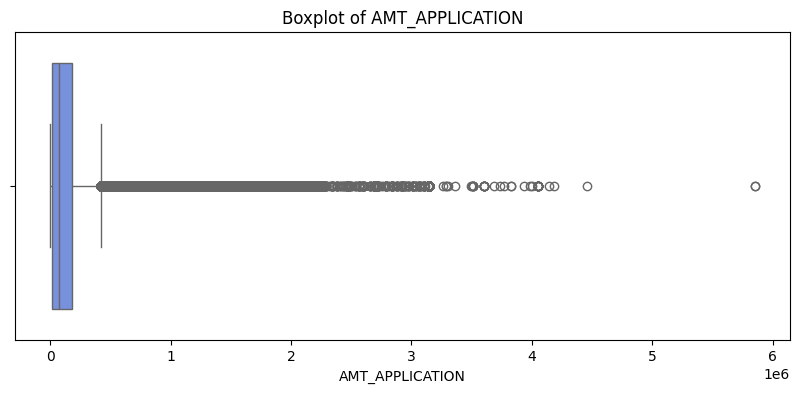

Outliers detected in column AMT_APPLICATION: 43012 rows


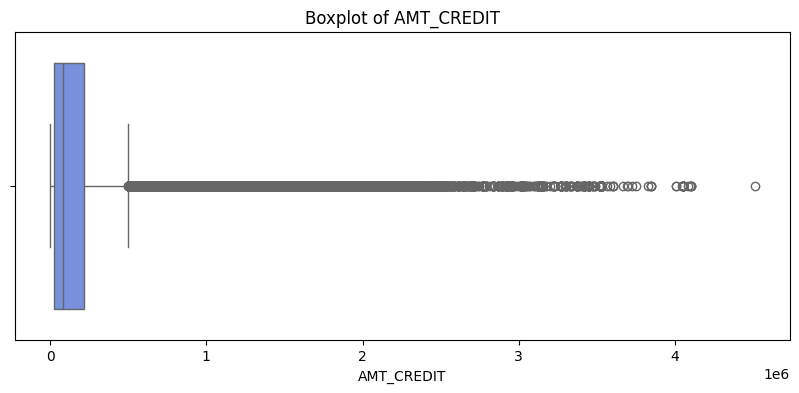

Outliers detected in column AMT_CREDIT: 40158 rows


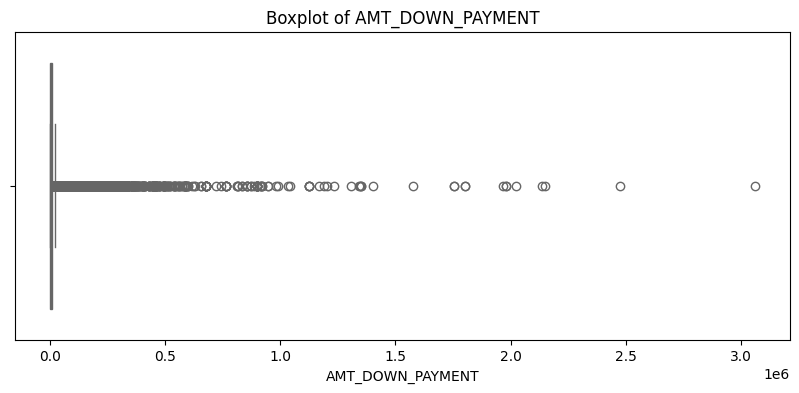

Outliers detected in column AMT_DOWN_PAYMENT: 5324 rows


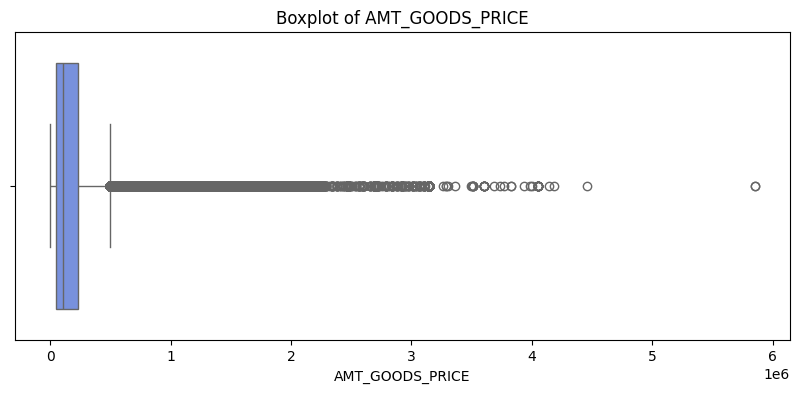

Outliers detected in column AMT_GOODS_PRICE: 26833 rows


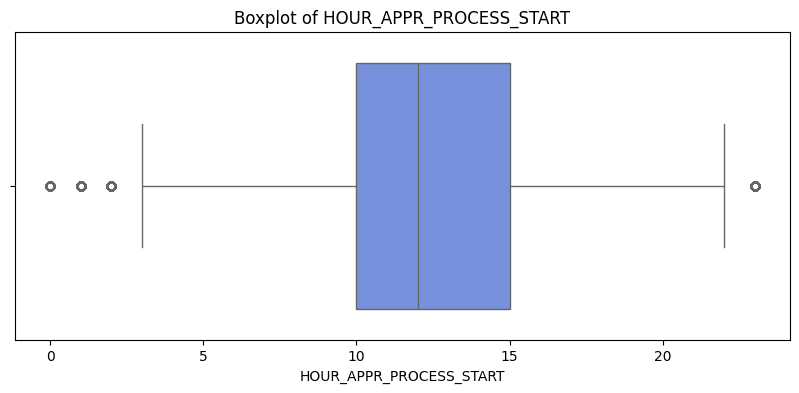

Outliers detected in column HOUR_APPR_PROCESS_START: 1385 rows


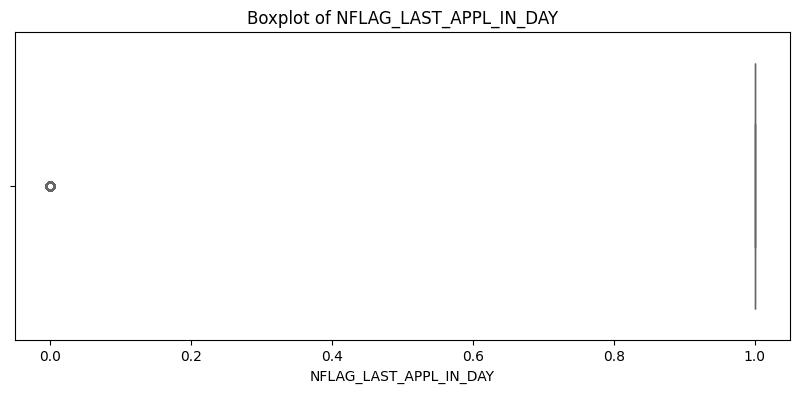

Outliers detected in column NFLAG_LAST_APPL_IN_DAY: 5044 rows


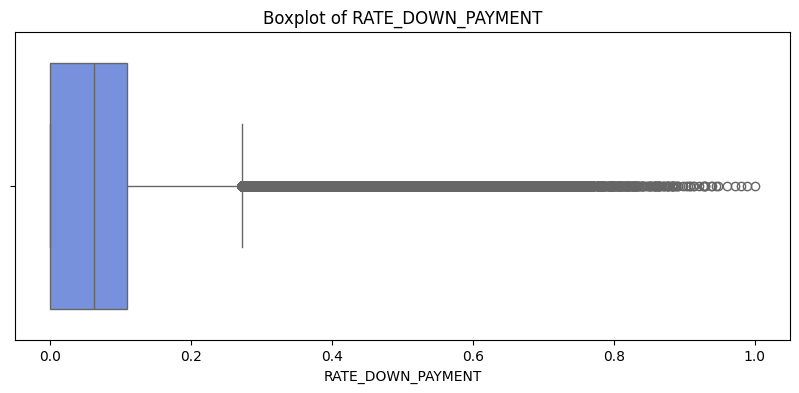

Outliers detected in column RATE_DOWN_PAYMENT: 15797 rows


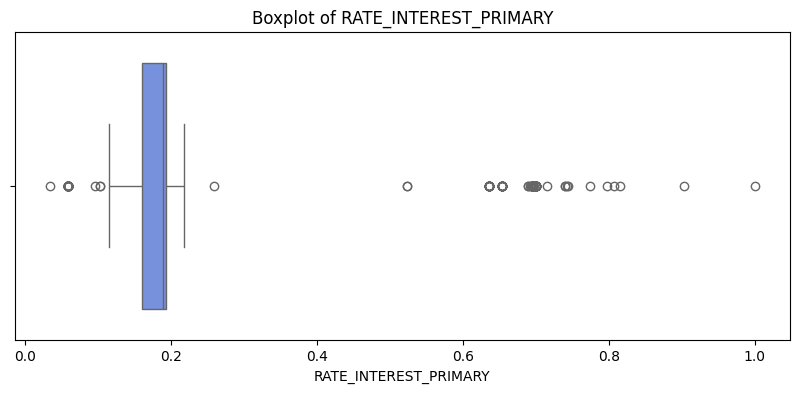

Outliers detected in column RATE_INTEREST_PRIMARY: 142 rows


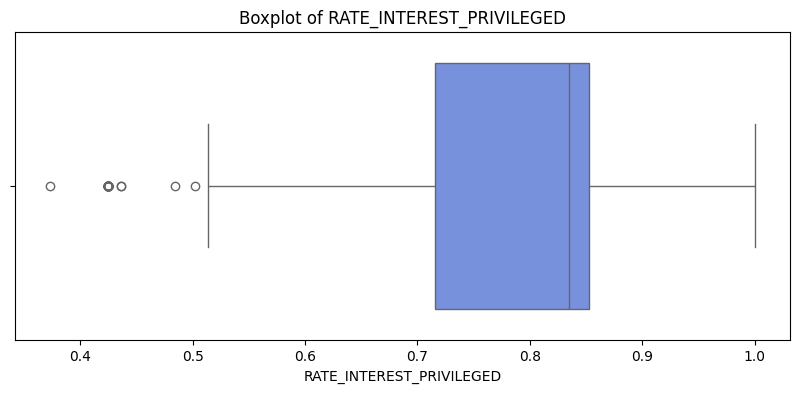

Outliers detected in column RATE_INTEREST_PRIVILEGED: 47 rows


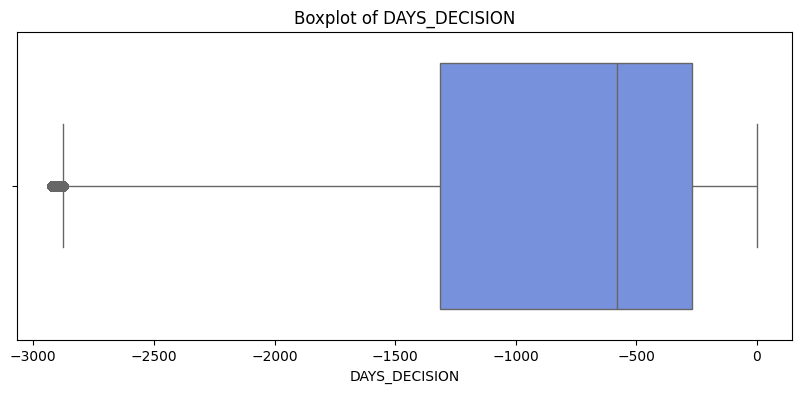

No outliers detected in column DAYS_DECISION.


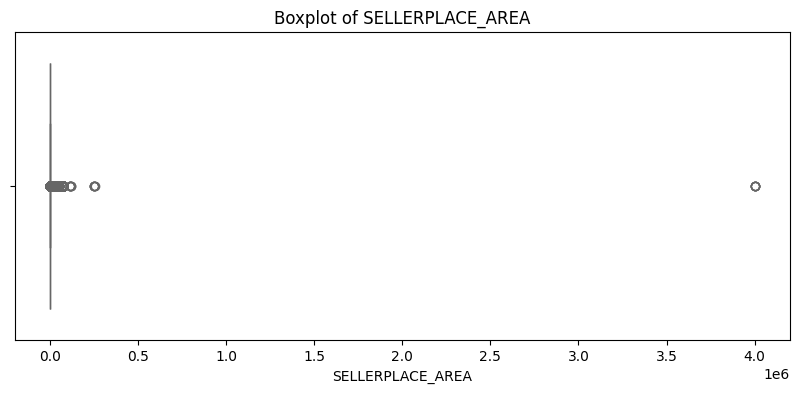

Outliers detected in column SELLERPLACE_AREA: 1154 rows


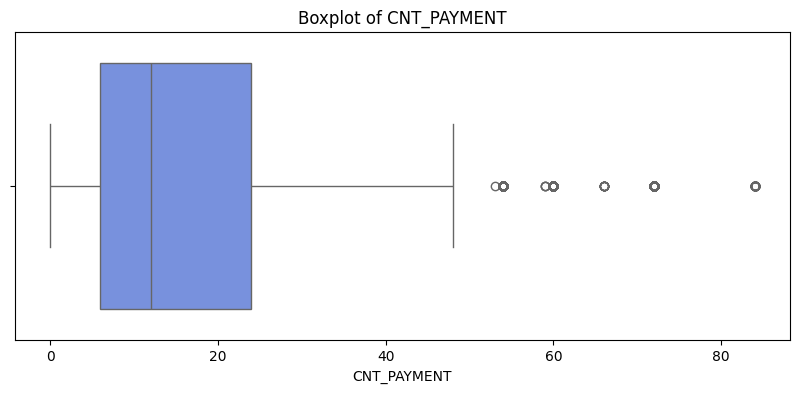

Outliers detected in column CNT_PAYMENT: 45875 rows


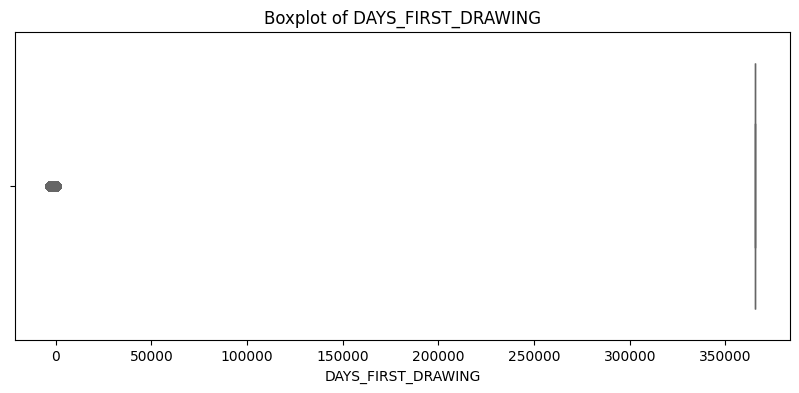

Outliers detected in column DAYS_FIRST_DRAWING: 53501 rows


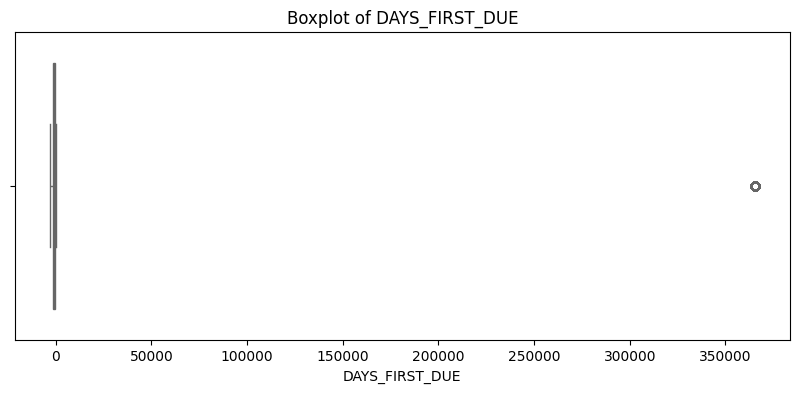

Outliers detected in column DAYS_FIRST_DUE: 33962 rows


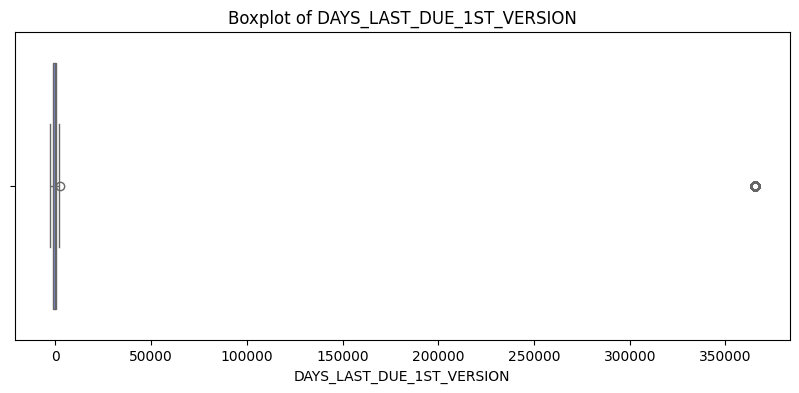

Outliers detected in column DAYS_LAST_DUE_1ST_VERSION: 79099 rows


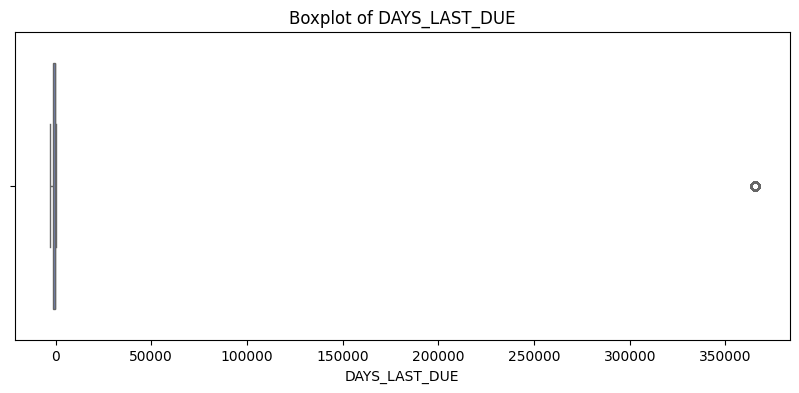

No outliers detected in column DAYS_LAST_DUE.


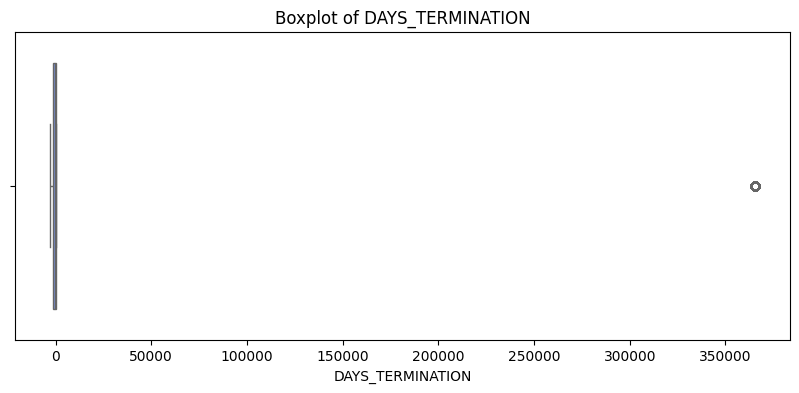

No outliers detected in column DAYS_TERMINATION.


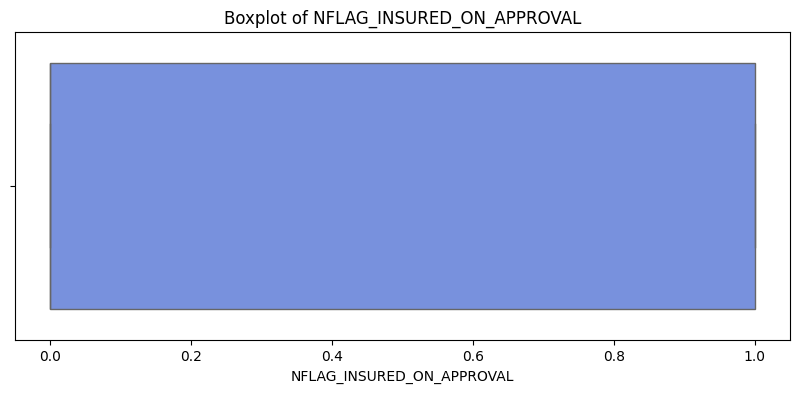

No outliers detected in column NFLAG_INSURED_ON_APPROVAL.


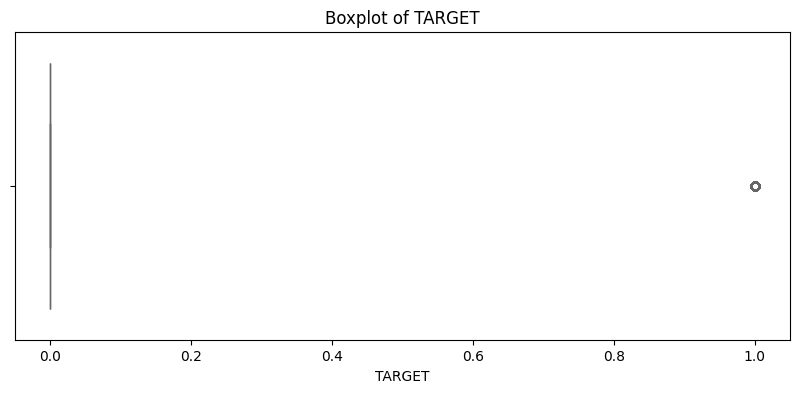

Outliers detected in column TARGET: 97623 rows


In [13]:
checking_outlier(prev_app)

DAY_DECISION, DAYS_LAST_DUE, DAY_TERMINATION, NFLAG_INSURED_ON_APPROVAL: No outliers were detected in these columns.

AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_DOWN_PAYMENT, AMT_GOODS_PRICE, HOUR_APPR_PROCESS_START, CNT_PAYMENT: right-skewed distribution 

RATE_DOWN_PAYNENT, RATE_INTERSET_PRIMARY, RATE_INTEREST_PRIVILEGED, DAYS_DECISION: left-skewed distribution

DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAYS_LAST_DUE, DAYS_TERMINATION: some outliers have value greater than 350000, This outlier could be due to data entry error 

## IMBALANCE


=== Checking for Imbalanced Columns ===
Column 'NAME_CONTRACT_TYPE' is BALANCED (Max class proportion: 44.33%).
Column 'WEEKDAY_APPR_PROCESS_START' is BALANCED (Max class proportion: 15.25%).

Column 'FLAG_LAST_APPL_PER_CONTRACT' is IMBALANCED (Max class proportion: 99.48%):
FLAG_LAST_APPL_PER_CONTRACT
Y    0.994826
N    0.005174
Name: proportion, dtype: float64


d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:301: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


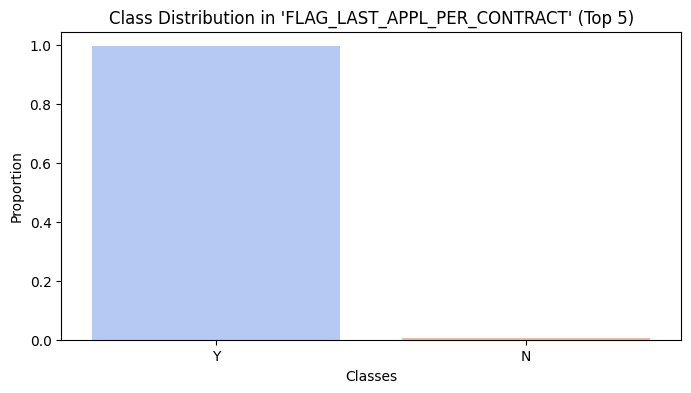

Column 'NAME_CASH_LOAN_PURPOSE' is BALANCED (Max class proportion: 55.67%).
Column 'NAME_CONTRACT_STATUS' is BALANCED (Max class proportion: 62.68%).
Column 'NAME_PAYMENT_TYPE' is BALANCED (Max class proportion: 62.44%).

Column 'CODE_REJECT_REASON' is IMBALANCED (Max class proportion: 81.03%):
CODE_REJECT_REASON
XAP       0.810308
HC        0.103264
LIMIT     0.033793
SCO       0.023086
CLIENT    0.016107
SCOFR     0.007693
XNA       0.003097
VERIF     0.002178
SYSTEM    0.000475
Name: proportion, dtype: float64


d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:301: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


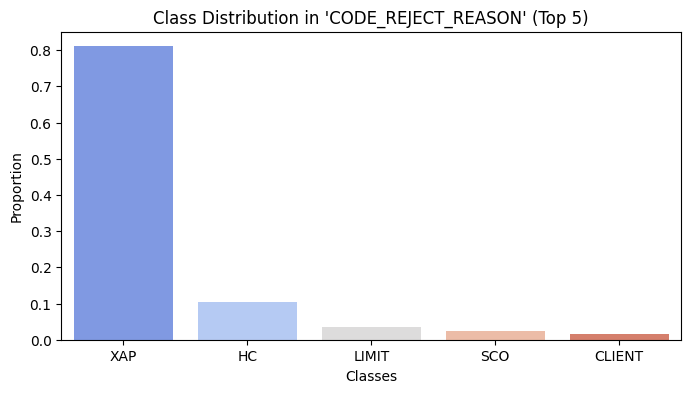

Column 'NAME_TYPE_SUITE' is BALANCED (Max class proportion: 59.47%).

Column 'NAME_CLIENT_TYPE' is IMBALANCED (Max class proportion: 73.40%):
NAME_CLIENT_TYPE
Repeater     0.734018
New          0.183589
Refreshed    0.081301
XNA          0.001091
Name: proportion, dtype: float64


d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:301: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.index, y=top_features.values, palette="coolwarm")


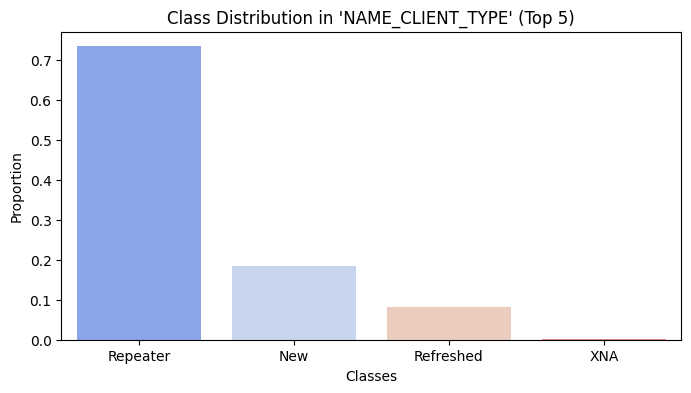

Column 'NAME_GOODS_CATEGORY' is BALANCED (Max class proportion: 56.39%).
Column 'NAME_PORTFOLIO' is BALANCED (Max class proportion: 41.91%).
Column 'NAME_PRODUCT_TYPE' is BALANCED (Max class proportion: 63.67%).
Column 'CHANNEL_TYPE' is BALANCED (Max class proportion: 42.47%).
Column 'NAME_SELLER_INDUSTRY' is BALANCED (Max class proportion: 50.60%).
Column 'NAME_YIELD_GROUP' is BALANCED (Max class proportion: 30.36%).
Column 'PRODUCT_COMBINATION' is BALANCED (Max class proportion: 16.63%).
Column 'NFLAG_INSURED_ON_APPROVAL' is BALANCED (Max class proportion: 66.94%).


In [14]:
checking_imbalance(prev_app)

## Checking variance


=== Low-Variance Feature Detection ===


d:\Vũ Xuân Bách\NEU-HK5\Data Preparation\final\EDA\utils.py:334: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=numeric_cols, y=variances, palette="viridis")


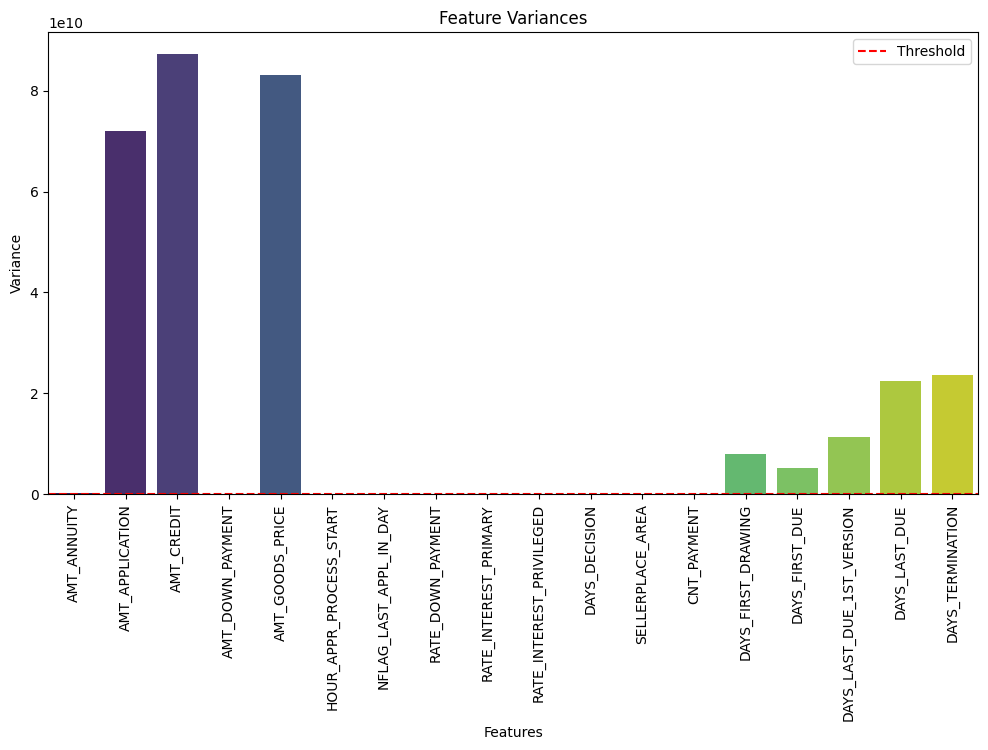

Low-variance columns to be removed: ['NFLAG_LAST_APPL_IN_DAY', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']


['NFLAG_LAST_APPL_IN_DAY', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED']

In [15]:
low_variance(prev_app)